# Capstone 2: Exploratory Data Analysis

With the EDA, the goal is to determine what factors affect the base price of a rental Airbnb unit in New York City. To do so, the relationships between various features needs to be explored, along with their relationship with the price of current units in the dataset and the existing outliers. 

# Imports

Importing necessary packages and libraries:

In [1]:
#Import necessary packages/libraries

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns
import scipy.stats as stats
import random
import ppscore as pps

Importing the cleaned data set:

In [2]:
df = pd.read_csv('C:\\Users\\cssv9\\Desktop\\SB DS\\df1.csv')
pd.set_option('display.max_columns', None)  
pd.set_option('max_columns', None)

## Initial Look At The Data

In [3]:
df.head()

,Unnamed: 0,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathroom_type
0,0,2595,2008-09-09,a few days or more,34.0,19.0,False,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",True,True,Midtown,Manhattan,40.75356,-73.98559,Rental unit,Entire home/apt,1,1.0,1,1.0,"['Free street parking', 'Heating', 'TV', 'Dedi...",150.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,True,5,35,65,340,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,False,3,3,0,0,0.33,Private
1,1,3831,2008-12-07,within a day,50.0,86.0,False,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",True,True,Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Other,Entire home/apt,3,1.0,1,3.0,"['Dedicated workspace', 'Iron', 'Stove', 'Hair...",76.0,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,True,0,4,9,208,408,58,0,2015-01-05,2021-06-29,4.46,4.59,4.50,4.79,4.81,4.72,4.65,False,1,1,0,0,5.03,Private
2,3,5136,2009-02-03,within a day,50.0,33.0,False,1.0,1.0,"['email', 'phone', 'reviews']",True,True,Sunset Park,Brooklyn,40.66265,-73.99454,Rental unit,Entire home/apt,4,1.5,2,2.0,"['Dryer', 'BBQ grill', 'Kitchen', 'Long term s...",275.0,5,1125,5.0,5.0,1125.0,1125.0,5.0,1125.0,True,0,0,0,204,2,1,1,2014-01-02,2021-08-08,5.00,5.00,5.00,5.00,5.00,4.50,5.00,False,1,1,0,0,0.02,Private
3,4,5178,2009-03-03,within an hour,100.0,100.0,False,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",True,False,Midtown,Manhattan,40.76457,-73.98317,Rental unit,Private room,2,1.0,1,1.0,"['Hot water', 'Bed linens', 'Extra pillows and...",68.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,True,1,5,14,243,490,17,2,2010-08-18,2021-08-14,4.21,4.20,3.73,4.66,4.40,4.86,4.36,False,1,0,1,0,3.64,Private
4,5,5203,2009-02-05,not given,not given,not given,False,1.0,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",True,True,Upper West Side,Manhattan,40.80380,-73.96751,Rental unit,Private room,1,1.0,1,1.0,"['Hot water', 'Smoke alarm', 'Paid parking off...",75.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,True,0,0,0,0,118,0,0,2010-10-09,2017-07-12,4.91,4.83,4.82,4.97,4.95,4.94,4.92,False,1,0,1,0,0.89,Shared


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36152 entries, 0 to 36151
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    36152 non-null  int64  
 1   id                                            36152 non-null  int64  
 2   host_since                                    36152 non-null  object 
 3   host_response_time                            36152 non-null  object 
 4   host_response_rate                            36152 non-null  object 
 5   host_acceptance_rate                          36152 non-null  object 
 6   host_is_superhost                             36152 non-null  bool   
 7   host_listings_count                           36152 non-null  float64
 8   host_total_listings_count                     36152 non-null  float64
 9   host_verifications                            36152 non-null 

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)

# Exploring the Data

Because of the end goal of this project, **Price** will be the dependent variable. 

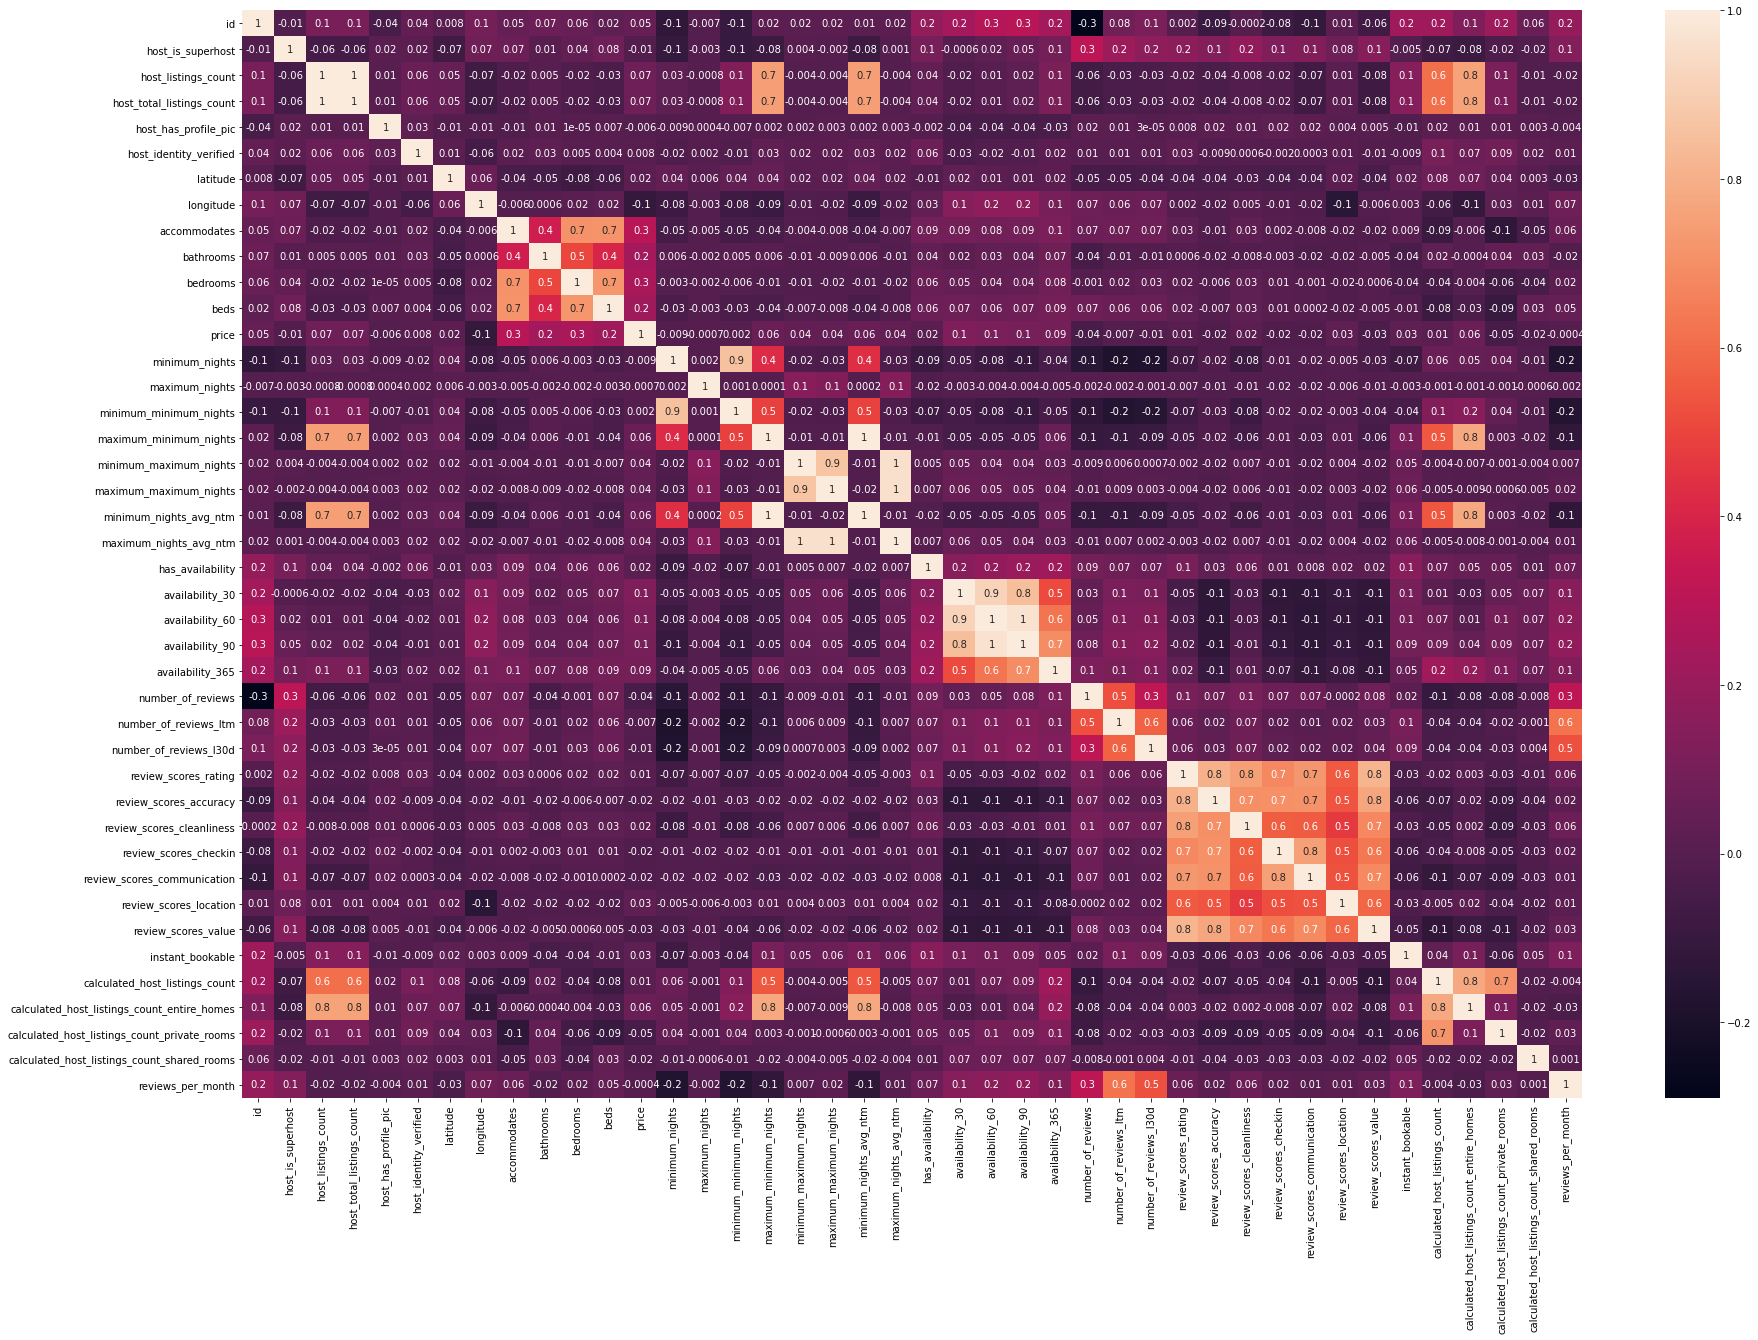

In [6]:
#a correlation heat map using Seaborn
fig, ax = plt.subplots(figsize=(30,20))
ax = sns.heatmap(df.corr(), annot=True, fmt='0.1g');

There is a lot to unpack here. <br><br>

The first set of obbservations:<br>
• The number of people a unit accomodates and the number of bathrooms it has have a positive correlation (0.4) <br>
• The number of people a unit accommodates and the number of bedrooms as well as the number of beds it has have a positive correlation (0.7 and 0.7 respectively) <br>
• The number of people a unit accommodates and the price of the unit are positively correlated(0.3) <br>
• The number of bathrooms and the number of bedrooms in a unit have a positive correlation of 0.5 <br>
• The number of bathrooms and the number of beds in a unit have a positive correlation of 0.4 <br>
• The price of a unit and the number of bathrooms in it have a positive correlation of 0.2 <br>
• The price of a unit and the number of bedrooms in it have a positive correlation of 0.3 <br>
• The number of beds in a unit and the price of a unity have a positive correlation of 0.2 <br><br>

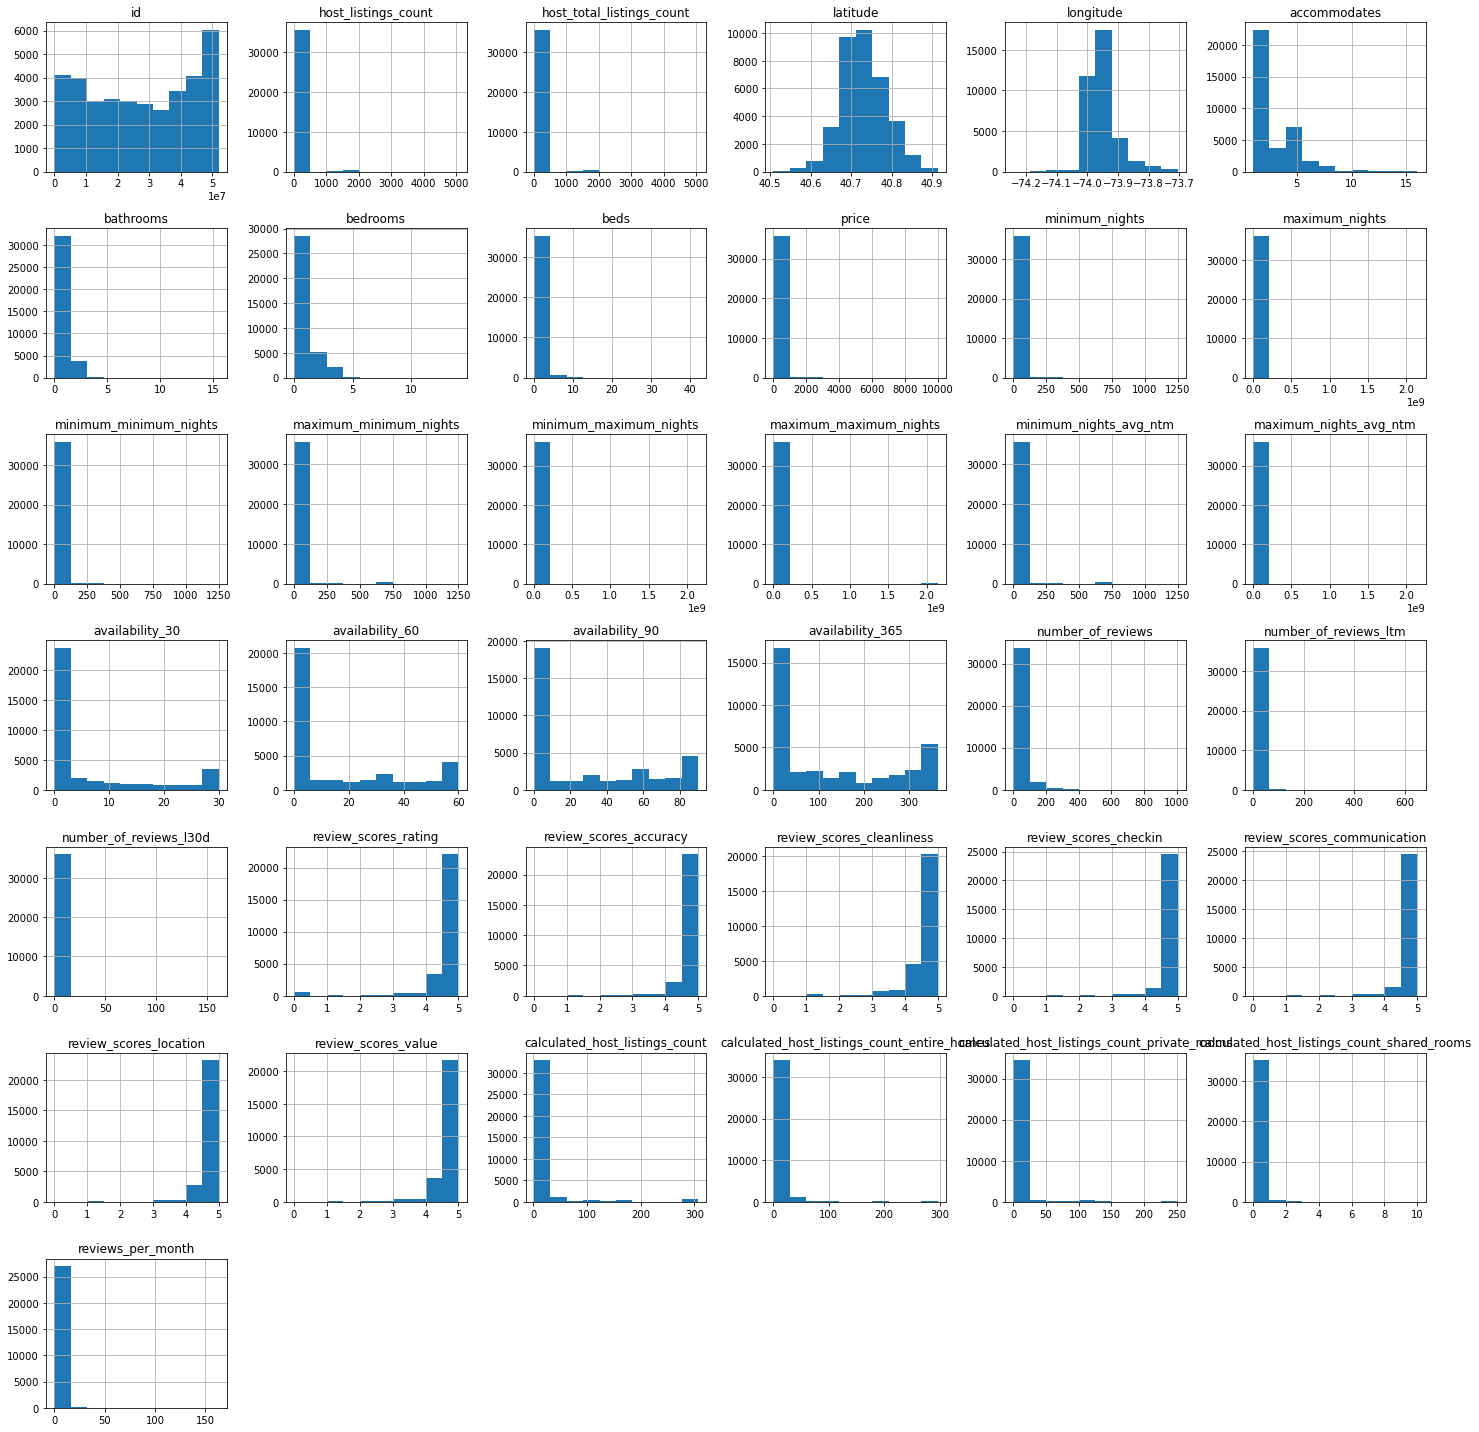

In [7]:
df.hist(figsize = (20, 20), bins = 10)
plt.tight_layout()

## Exploring the "Price" Column

In [8]:
df['price'].describe()

count    36152.000000
mean       169.779127
std        300.904150
min         10.000000
25%         70.000000
50%        113.000000
75%        185.000000
max      10000.000000
Name: price, dtype: float64

In [9]:
df['price'].median()

113.0

The **mean price** for a unit in New York City is \\$169.78 
<br> The **median price** is \\$113.0
<br> The **maximum price** is \\$10,000 and the minimum price is \\$10.

In [10]:
df[df["price"]==df["price"].min()]

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathroom_type
12338,17952277,2016-03-12,not given,not given,not given,False,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",True,True,Bushwick,Brooklyn,40.699790,-73.921200,Rental unit,Private room,2,1.0,1,1.0,"['Heating', 'Dedicated workspace', 'Shampoo', ...",10.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,False,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,0,1,0,NaN,Shared
17391,26602421,2018-07-04,not given,not given,not given,False,1.0,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",True,True,Chelsea,Manhattan,40.753770,-73.997960,Rental unit,Entire home/apt,4,1.0,1,0.0,"['Elevator', 'Dishes and silverware', 'Cooking...",10.0,60,1125,60.0,60.0,1125.0,1125.0,60.0,1125.0,False,0,0,0,0,4,0,0,2019-02-10,2018-08-12,5.00,4.75,4.25,4.75,5.00,5.00,4.75,False,1,1,0,0,0.13,Private
18090,27967621,2014-04-06,within an hour,100.0,100.0,True,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",True,True,Randall Manor,Staten Island,40.636070,-74.096310,Other,Entire home/apt,4,1.0,1,2.0,"['Dedicated workspace', 'Iron', 'Stove', 'Hair...",10.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,True,0,0,0,218,88,28,4,2019-08-01,2021-08-15,4.92,4.93,4.97,4.98,4.99,4.84,4.95,False,1,1,0,0,3.45,Private
24295,39340742,2019-10-13,not given,not given,not given,False,0.0,0.0,"['email', 'phone']",True,False,Flushing,Queens,40.758320,-73.829470,Rental unit,Entire home/apt,1,1.0,1,1.0,"['Elevator', 'Long term stays allowed']",10.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,True,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1,1,0,0,NaN,Private
28749,45485378,2020-09-15,not given,not given,90.0,False,0.0,0.0,"['phone', 'offline_government_id', 'selfie', '...",True,True,Harlem,Manhattan,40.821590,-73.955050,Rental unit,Private room,2,1.0,1,0.0,"['Elevator', 'Kitchen', 'Iron', 'Wifi', 'Hange...",10.0,30,365,30.0,30.0,365.0,365.0,30.0,365.0,True,0,0,0,0,1,1,0,2020-10-30,2020-10-30,5.00,5.00,5.00,5.00,5.00,5.00,5.00,False,1,0,1,0,0.10,Private
35821,51824986,2019-04-27,within an hour,100.0,100.0,False,0.0,0.0,"['phone', 'offline_government_id', 'government...",True,False,Harlem,Manhattan,40.819596,-73.954527,Rental unit,Entire home/apt,2,1.0,1,1.0,"['Kitchen', 'Smoke alarm', 'Washer', 'Dedicate...",10.0,6,8,6.0,6.0,8.0,8.0,6.0,8.0,True,0,0,0,11,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1,0,0,NaN,Private


The minimum price for a unit in New York City is $10.0. There are 6 units that are listed for this price.

In [11]:
df[df["price"]==df["price"].max()]

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathroom_type
10234,13925864,2016-02-12,not given,not given,not given,False,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'selfie...",True,True,Long Island City,Queens,40.76128,-73.93141,Rental unit,Entire home/apt,4,1.0,2,2.0,"['Kitchen', 'Smoke alarm', 'Heating', 'Hangers...",10000.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,False,0,0,0,0,28,0,0,2016-09-29,2017-11-14,4.14,4.57,4.14,4.39,4.46,4.46,4.25,False,1,1,0,0,0.47,Private
15525,22436899,2016-05-16,not given,not given,not given,False,1.0,1.0,['phone'],True,False,Upper West Side,Manhattan,40.77184,-73.98835,Rental unit,Entire home/apt,4,1.0,1,1.0,"['Elevator', 'Wifi', 'Hangers', 'Dedicated wor...",10000.0,30,120,30.0,30.0,120.0,120.0,30.0,120.0,False,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1,0,0,NaN,Private
15803,22985168,2016-05-12,not given,not given,0.0,False,1.0,1.0,"['email', 'phone']",True,False,Astoria,Queens,40.76466,-73.92882,Condominium (condo),Entire home/apt,2,1.0,1,1.0,"['Dedicated workspace', 'Kitchen', 'Long term ...",10000.0,72,1125,72.0,72.0,1125.0,1125.0,72.0,1125.0,True,28,58,88,88,26,0,0,2018-04-19,2019-10-26,4.81,4.71,4.57,5.00,5.00,4.71,4.71,False,1,1,0,0,0.63,Private
20009,31219800,2018-02-07,not given,not given,not given,False,1.0,1.0,"['email', 'phone']",True,False,Murray Hill,Manhattan,40.74931,-73.97830,Loft,Shared room,1,2.0,1,5.0,"['Heating', 'Dedicated workspace', 'Cleaning b...",10000.0,40,365,40.0,40.0,365.0,365.0,40.0,365.0,True,30,60,90,180,11,0,0,2019-03-27,2019-06-25,4.50,4.40,3.90,4.40,4.40,4.30,4.20,False,1,0,0,1,0.37,Shared
24119,39100961,2018-10-12,not given,not given,100.0,False,11.0,11.0,"['email', 'phone']",True,True,Midtown,Manhattan,40.76387,-73.97653,Hotel,Private room,2,1.0,1,0.0,"['Private entrance', 'Essentials', 'First aid ...",10000.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,True,0,0,8,283,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,11,0,1,0,NaN,Shared
24497,39574087,2019-06-06,within an hour,89.0,99.0,False,4.0,4.0,"['email', 'phone', 'work_email']",True,True,Lower East Side,Manhattan,40.71918,-73.99123,Hotel,Private room,2,1.0,1,1.0,"['Private entrance', 'Breakfast', 'First aid k...",10000.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,True,30,60,90,365,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,5,0,1,0,NaN,Private
31183,48097641,2019-03-29,not given,not given,not given,False,1.0,1.0,"['email', 'phone', 'identity_manual']",True,True,Sheepshead Bay,Brooklyn,40.59190,-73.94563,Rental unit,Entire home/apt,4,1.0,1,1.0,"['Dryer', 'Air conditioning', 'TV', 'Hot tub',...",10000.0,1,4,1.0,1.0,4.0,4.0,1.0,4.0,True,30,60,90,365,1,1,0,2021-02-11,2021-02-11,5.00,5.00,5.00,5.00,5.00,5.00,5.00,False,1,1,0,0,0.15,Private


The maximum price for a unit in New York City is $10,000.0. There are 7 listings in the dataset with this price.

In [12]:
df['price'].value_counts(sort='descending')

150.0     1260
100.0     1167
50.0       889
60.0       868
80.0       762
          ... 
3333.0       1
796.0        1
868.0        1
548.0        1
740.0        1
Name: price, Length: 926, dtype: int64

There are 1260 units that are priced for $150.0. This is the **mode** of the prices.

### Distribution of Price

<AxesSubplot:>

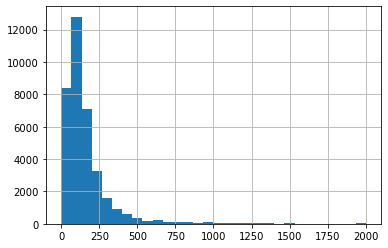

In [13]:
df['price'].hist(bins=30, range=(0,2000))

[(0.0, 2000.0)]

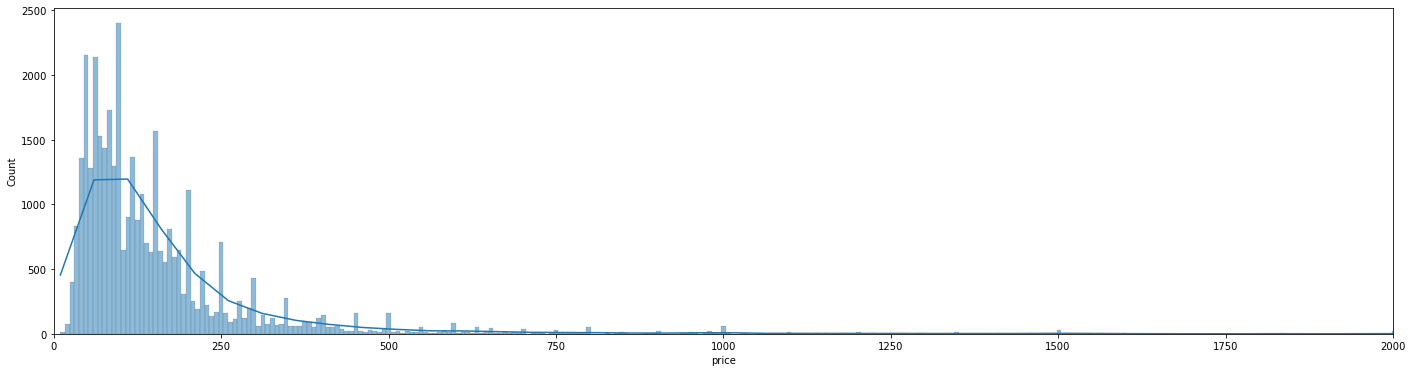

In [14]:
#distribution plot for price column
fig, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
ax.set(xlim = (0,2000))

This is a **right-skewed distribution**.

We will plot a probability plot, to help determine if the data set follows a normal distribution. 

((array([-4.11722659, -3.90796112, -3.79373225, ...,  3.79373225,
          3.90796112,  4.11722659]),
  array([   10.,    10.,    10., ..., 10000., 10000., 10000.])),
 (161.44825828707, 169.779127019252, 0.5364914529557528))

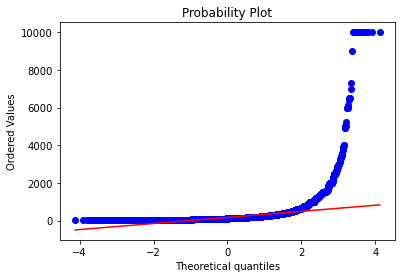

In [15]:
stats.probplot(df['price'], dist="norm", plot=plt)

From the above kde distribution plot and the probability plot, we see that the data does not entirely follow the normal distribution. <br>
Now, because the data is skewed, let's try the method of *log transform*.

In [16]:
#log-transform
#from: https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114

df['price_log'] = (df['price']+1).transform(np.log)

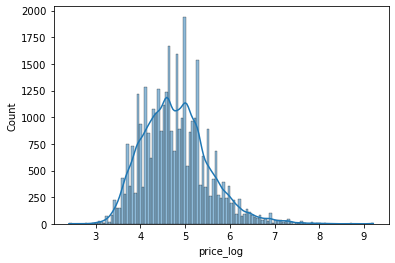

In [17]:
ax = sns.histplot(x=df['price_log'], kde=True)

This is a **bimodal distribution**.

We will plot a probability plot, to help determine if the data set follows a normal distribution. 

((array([-4.11722659, -3.90796112, -3.79373225, ...,  3.79373225,
          3.90796112,  4.11722659]),
  array([2.39789527, 2.39789527, 2.39789527, ..., 9.21044037, 9.21044037,
         9.21044037])),
 (0.7336602770574823, 4.785988110923715, 0.9867204769434844))

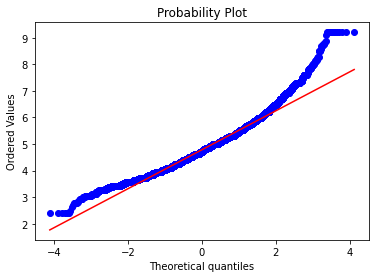

In [18]:
stats.probplot(df['price_log'], dist="norm", plot=plt)

Below, we will use the Predictive Power Score Package in order to detect linear or non-linear relationships between two columns. <br>
https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598

In [19]:
pps.predictors(df, 'price')

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,price_log,price,0.990253,regression,True,mean absolute error,103.1478,1.005400,DecisionTreeRegressor()
1,accommodates,price,0.038699,regression,True,mean absolute error,103.1478,99.156071,DecisionTreeRegressor()
2,amenities,price,0.030109,regression,True,mean absolute error,103.1478,100.042073,DecisionTreeRegressor()
3,calculated_host_listings_count_private_rooms,price,0.024625,regression,True,mean absolute error,103.1478,100.607804,DecisionTreeRegressor()
4,calculated_host_listings_count_entire_homes,price,0.001870,regression,True,mean absolute error,103.1478,102.954889,DecisionTreeRegressor()
5,id,price,0.000000,regression,True,mean absolute error,103.1478,155.295500,DecisionTreeRegressor()
6,host_since,price,0.000000,regression,True,mean absolute error,103.1478,115.637405,DecisionTreeRegressor()
7,host_response_time,price,0.000000,regression,True,mean absolute error,103.1478,116.349573,DecisionTreeRegressor()
8,host_response_rate,price,0.000000,regression,True,mean absolute error,103.1478,115.409188,DecisionTreeRegressor()
9,host_acceptance_rate,price,0.000000,regression,True,mean absolute error,103.1478,116.132991,DecisionTreeRegressor()


The above shows us that a non-linear relationship exists between **price** and the following: <br>
• accommodates<br>
• amenities <br>
• calculated_host_listings_count_private_rooms <br>
• calculated_host_listings_count_entire_homes <br>

<hr align="center">

## Price of Listings in Different Boroughs & Neighborhoods of NYC

The goal of this section is to understand the relationship between the price of a unit and the borough/neighborhood it is located in.

Text(0, 0.5, 'Latitude')

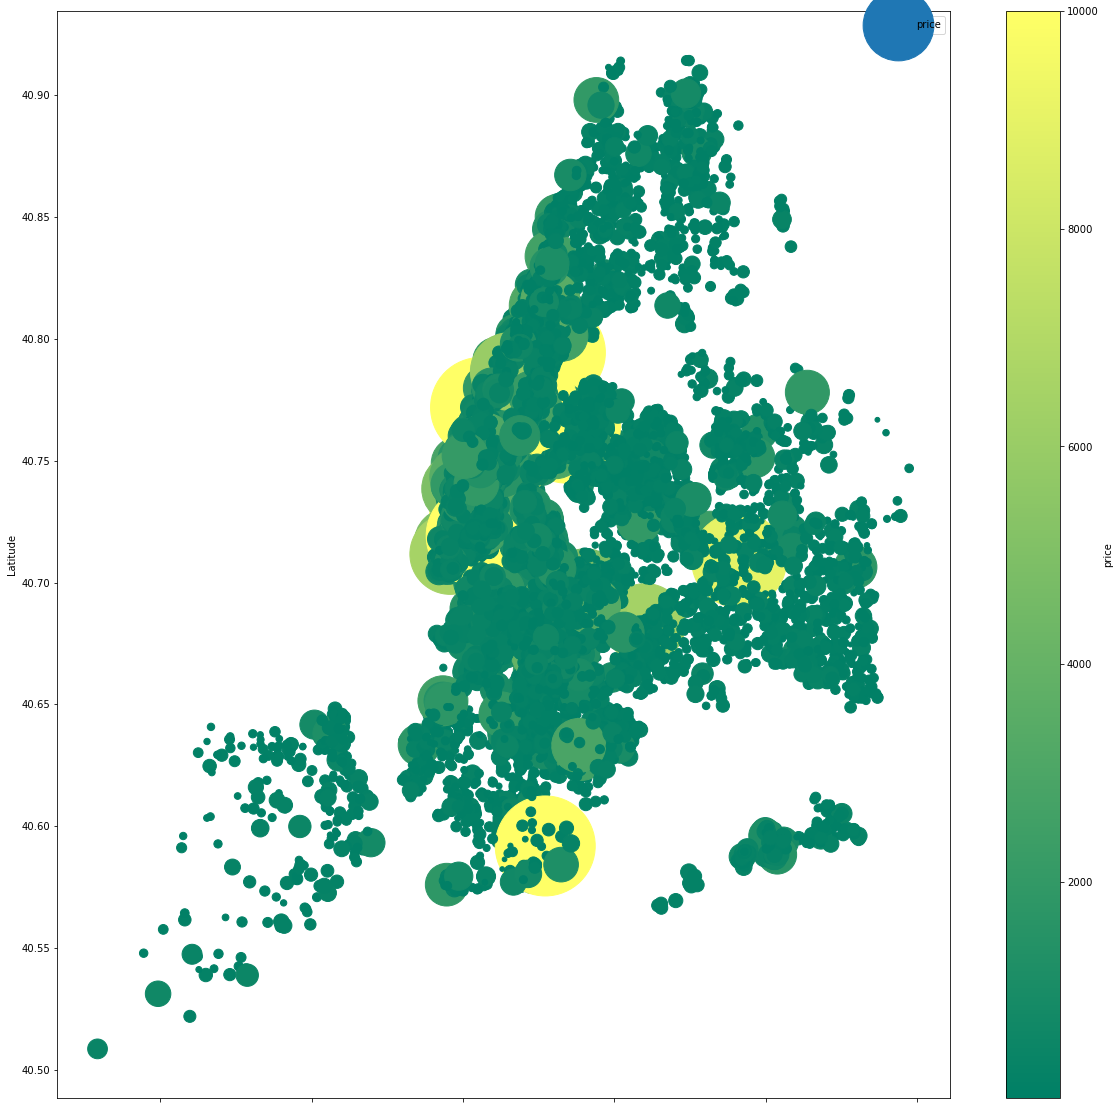

In [20]:
df.plot(kind='scatter', 
        x='longitude', y='latitude', 
        s='price', 
        label='price', 
        figsize=(20,20), 
        c="price", cmap='summer',
        colorbar=True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [21]:
#find the lowest & highest longitude/latitude
#get the screenshot from google maps of this area
#put it behind this plot

#https://stackoverflow.com/questions/45947971/overlay-scatter-plot-on-map-img

In [22]:
df['latitude'].min()

40.50863

In [23]:
df['latitude'].max()

40.91419425

In [24]:
df['longitude'].min()

-74.24135

In [25]:
df['longitude'].max()

-73.70524

### Boroughs & Price

There are 5 boroughs.

In [26]:
df['neighbourhood_group_cleansed'] = df['neighbourhood_group_cleansed'].astype('category')
df['neighbourhood_group_cleansed'].unique()

['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']
Categories (5, object): ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']

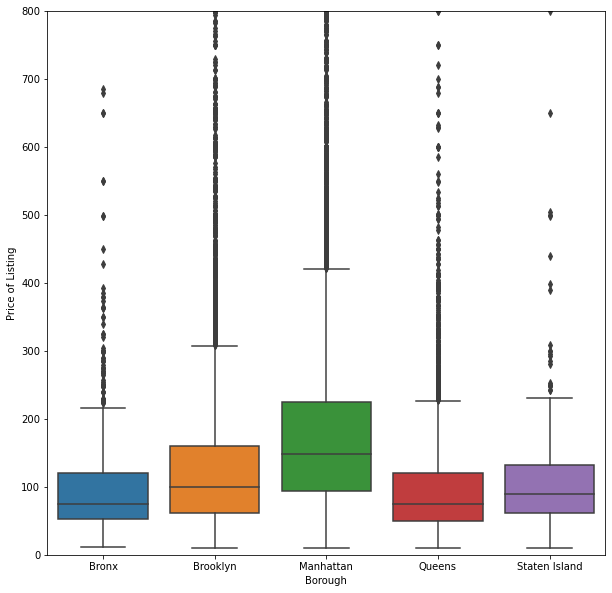

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(x='neighbourhood_group_cleansed', y='price', data=df)
plt.ylim(0,800)
plt.xlabel('Borough') 
plt.ylabel('Price of Listing')
plt.show()

So, clearly, there are some very extreme outliers. <br> However, we can make some observations from the data. 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bronx'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'Manhattan'),
  Text(3, 0, 'Queens'),
  Text(4, 0, 'Staten Island')])

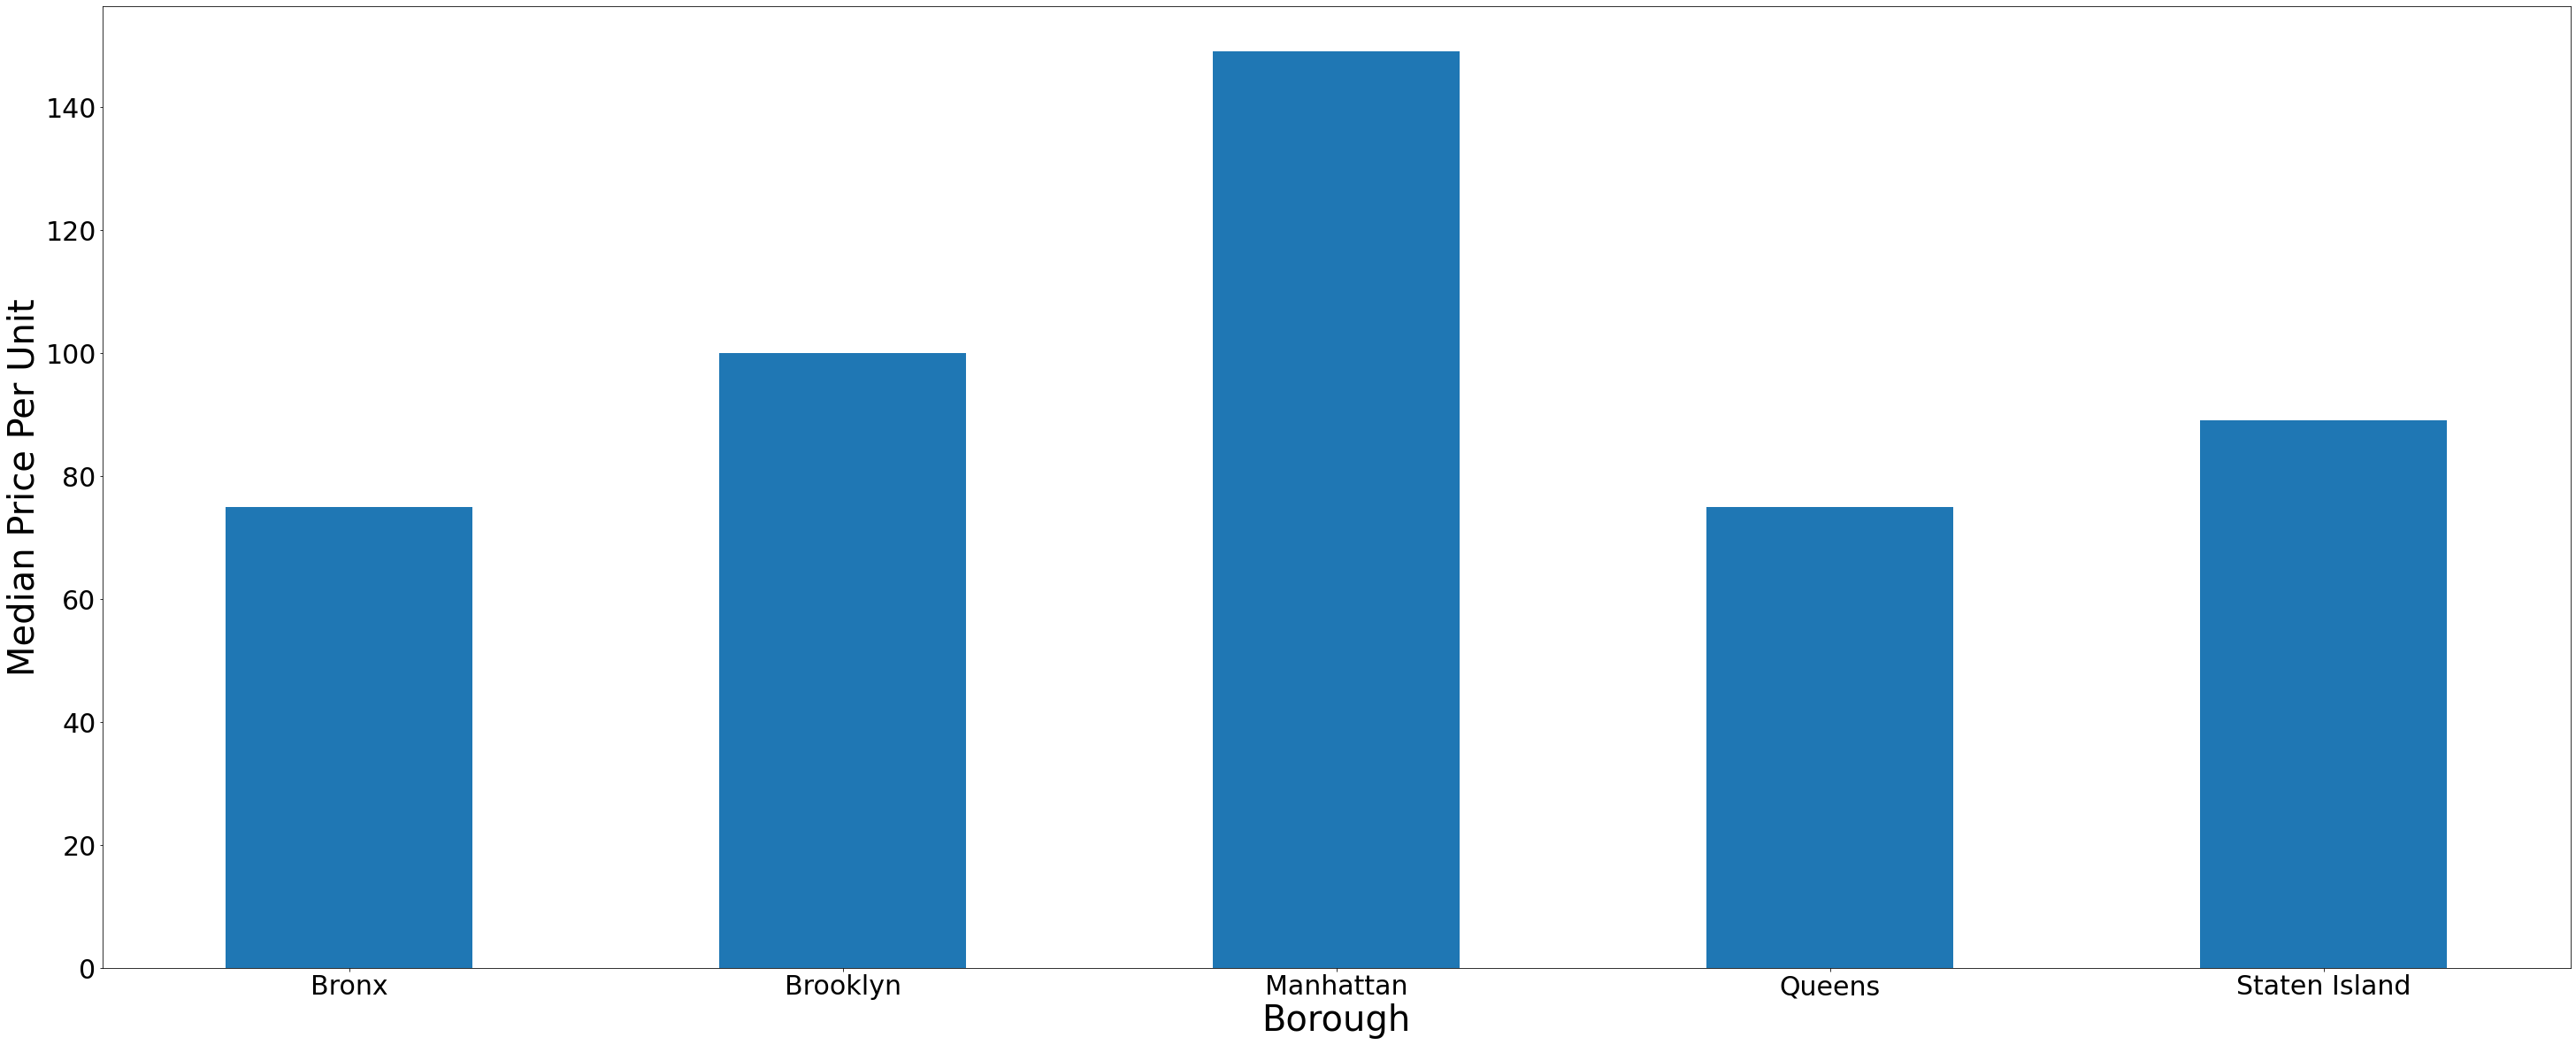

In [28]:
plt.figure(figsize=(50,20))
df.groupby('neighbourhood_group_cleansed')['price'].median().plot(kind='bar')
plt.xlabel('Borough', fontsize=40)
plt.ylabel('Median Price Per Unit', fontsize=40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30, rotation=0)

Since there are clear outliers in our data, we will be using median.

In [29]:
df.groupby('neighbourhood_group_cleansed')['price'].median().sort_values()

neighbourhood_group_cleansed
Bronx             75.0
Queens            75.0
Staten Island     89.0
Brooklyn         100.0
Manhattan        149.0
Name: price, dtype: float64

Thus: <br>
• Manhattan has the highest median price for listings <br>
• Bronx has the lowest median price for listings.

In [30]:
#the variance of listings' prices in each borough 
df.groupby('neighbourhood_group_cleansed')['price'].var().sort_values()

neighbourhood_group_cleansed
Bronx             11227.620878
Staten Island     13799.447358
Brooklyn          46649.052860
Queens            71826.910529
Manhattan        137924.875732
Name: price, dtype: float64

Additionally: <br>
• Manhattan has the largest range of variability of prices, while Bronx has the smallest range of variability.

### Boroughs & Number of Listings

In [31]:
pd.set_option("display.max_rows", None)
df['neighbourhood_group_cleansed'].value_counts(sort='descending')

Manhattan        15868
Brooklyn         14099
Queens            4873
Bronx             1003
Staten Island      309
Name: neighbourhood_group_cleansed, dtype: int64

Thus, Manhattan has the largest number of listings in the dataset while Staten Island has the smallest number of listings.

### Understanding Outliers in Price

In [32]:
#create a function to calculate ECDF

def ecdf(data):
    n = len(data) # Number of data points: n
    x = np.sort(data) # x-data for the ECDF: x
    y = np.arange(1, n+1) / n # y-data for the ECDF: y
    return x, y

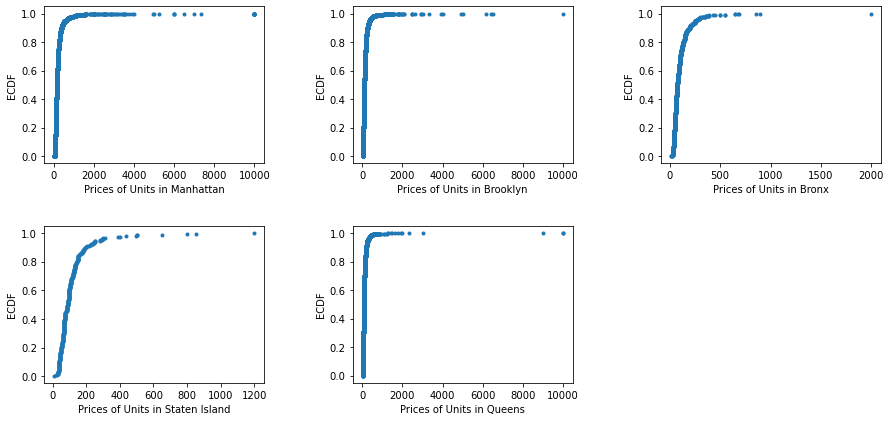

In [33]:
#from Stack Overflow: https://stackoverflow.com/questions/40081489/matplotlib-odd-subplots

fig, ax = plt.subplots(figsize=(15,15))

ax1 = plt.subplot2grid((4, 3), (0, 0))
ax2 = plt.subplot2grid((4, 3), (0, 1))
ax3 = plt.subplot2grid((4, 3), (0, 2))
ax4 = plt.subplot2grid((4, 3), (1, 0))
ax5 = plt.subplot2grid((4, 3), (1, 1))

plt.subplots_adjust(wspace = 0.4, hspace = 0.4) #make the figure look better

#manhattan
df_manhattan = df[df['neighbourhood_group_cleansed']=='Manhattan']
x_manh_price, y_manh_price = ecdf(df_manhattan['price'])
ax1.plot(x_manh_price, y_manh_price, marker='.', linestyle='none')
ax1.set_xlabel('Prices of Units in Manhattan')
ax1.set_ylabel('ECDF')

#brooklyn
df_brooklyn = df[df['neighbourhood_group_cleansed']=='Brooklyn']
x_brook_price, y_brook_price = ecdf(df_brooklyn['price'])
ax2.plot(x_brook_price, y_brook_price, marker='.', linestyle='none')
ax2.set_xlabel('Prices of Units in Brooklyn')
ax2.set_ylabel('ECDF')

#bronx
df_bronx = df[df['neighbourhood_group_cleansed']=='Bronx']
x_brx_price, y_brx_price = ecdf(df_bronx['price'])
ax3.plot(x_brx_price, y_brx_price, marker='.', linestyle='none')
ax3.set_xlabel('Prices of Units in Bronx')
ax3.set_ylabel('ECDF')

#staten island
df_si = df[df['neighbourhood_group_cleansed']=='Staten Island']
x_si_price, y_si_price = ecdf(df_si['price'])
ax4.plot(x_si_price, y_si_price, marker='.', linestyle='none')
ax4.set_xlabel('Prices of Units in Staten Island')
ax4.set_ylabel('ECDF')

#queens
df_queens = df[df['neighbourhood_group_cleansed']=='Queens']
x_q_price, y_q_price = ecdf(df_queens['price'])
ax5.plot(x_q_price, y_q_price, marker='.', linestyle='none')
ax5.set_xlabel('Prices of Units in Queens')
ax5.set_ylabel('ECDF')

plt.show()

The ECDFs show us the effect that outliers have on the distribution of the data. All five ECDF plots show a curve at around 0.9. 

array([[<AxesSubplot:title={'center':'Bronx'}>,
        <AxesSubplot:title={'center':'Brooklyn'}>],
       [<AxesSubplot:title={'center':'Manhattan'}>,
        <AxesSubplot:title={'center':'Queens'}>],
       [<AxesSubplot:title={'center':'Staten Island'}>, <AxesSubplot:>]],
      dtype=object)

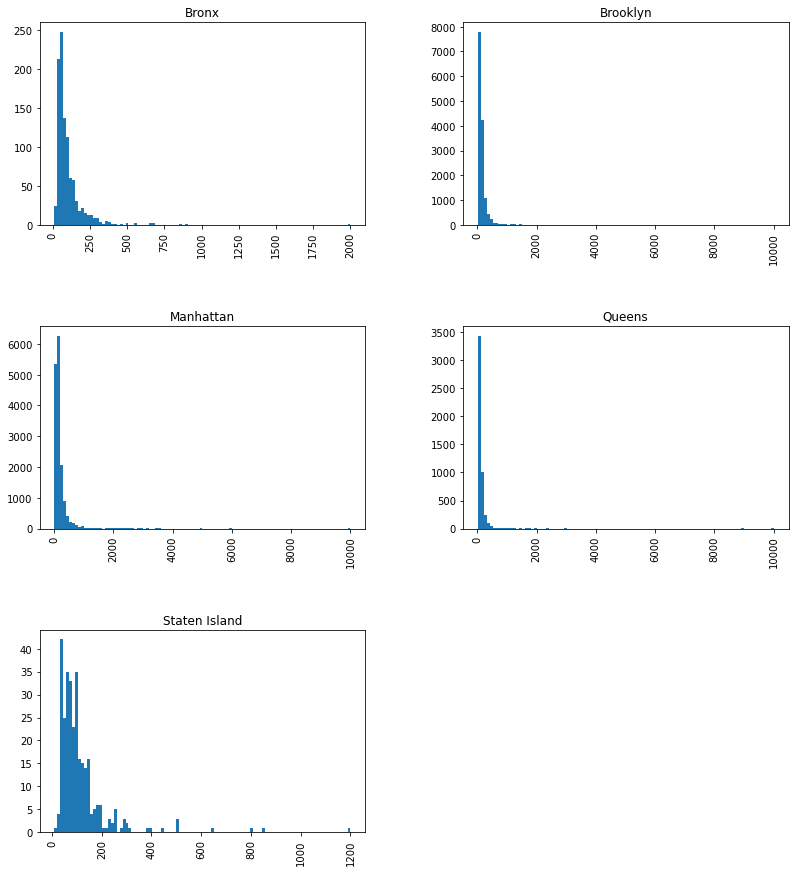

In [34]:
df.hist(column='price', by='neighbourhood_group_cleansed', bins=100, figsize=(13,15))

From the above histograms, it is observable that a large majority of the listings in each borough are listed at a price of less than $1000.

Now, is the price of a listing in a particular borough affected by the number of listings in the borough?
<br><br>
To do this, we will use an ANOVA test.
<br>
(https://towardsdatascience.com/anova-test-with-python-cfbf4013328b)

**Null hypothesis:** The mean prices of each of the listings in the 5 boroughs will be equal, signifying that the location of a listing does not have any affect on its price. <br>
Let's take the **alpha** as 5% (0.05).

In [35]:
stats.f_oneway(df_manhattan['price'], df_bronx['price'], df_brooklyn['price'], df_queens['price'], df_si['price'])

F_onewayResult(statistic=173.55036869391253, pvalue=1.6549221550146227e-147)

Thus, the **F-statistic** is 173.5504 and the **p-value** is 1.6549<br>
The p-value is greater than the alpha = 5% = 0.05. <br>
Thus, this means that the null hypothesis cannot be rejected, i.e. the borough in which a listing is located does not have an effect on the price of a listing.

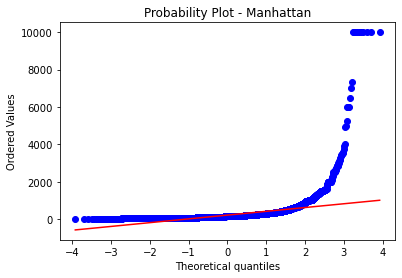

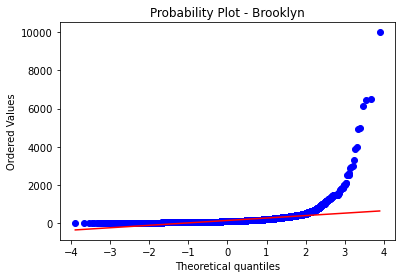

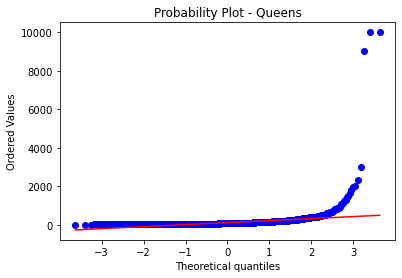

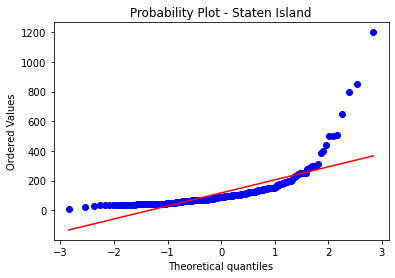

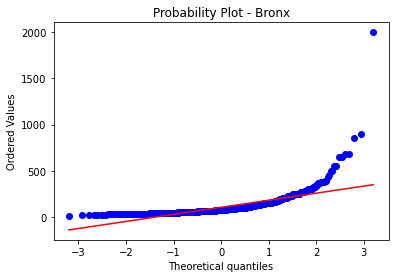

In [36]:
unique_borough = df['neighbourhood_group_cleansed'].unique()
for borough in unique_borough:
    stats.probplot(df[df['neighbourhood_group_cleansed'] == borough]['price'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  borough)
    plt.show()

<hr align="left" width="30%">

### Neighborhoods & Price

Text(0, 0.5, 'Mean Price Per Unit')

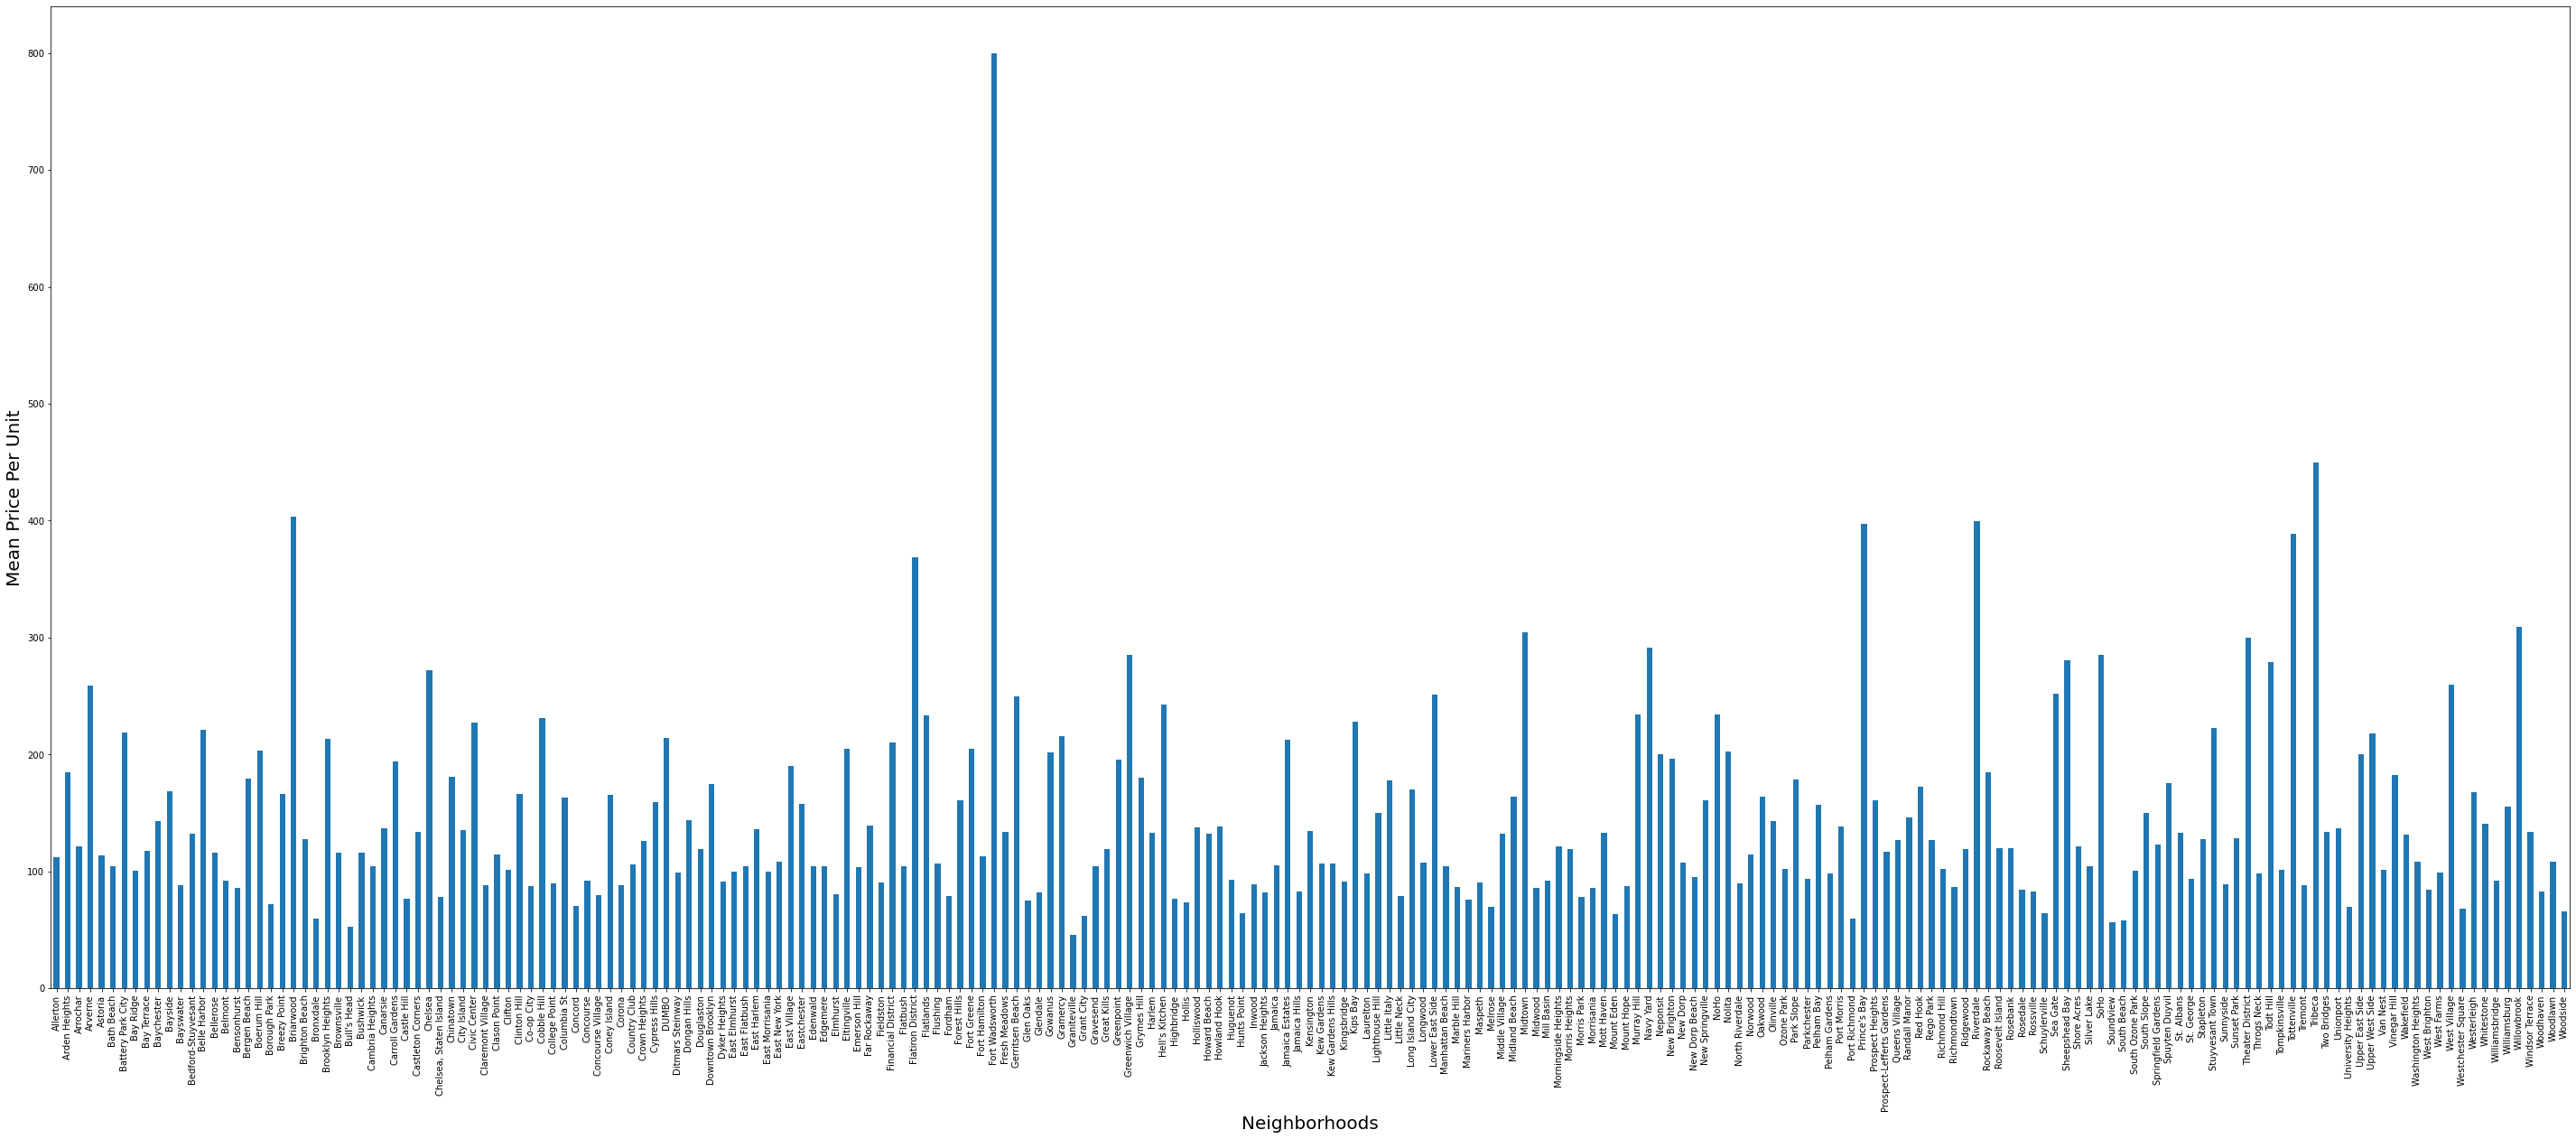

In [37]:
plt.figure(figsize=(50,20))
df.groupby('neighbourhood_cleansed')['price'].mean().plot(kind='bar')
plt.xlabel('Neighborhoods', fontsize=20)
plt.ylabel('Mean Price Per Unit', fontsize=20)

In [38]:
df.groupby('neighbourhood_cleansed')['price'].mean().sort_values()

neighbourhood_cleansed
Graniteville                  45.500000
Bull's Head                   53.000000
Soundview                     56.363636
South Beach                   58.000000
Bronxdale                     59.764706
Port Richmond                 59.857143
Grant City                    62.166667
Mount Eden                    63.600000
Schuylerville                 64.000000
Hunts Point                   64.607143
Woodside                      65.933862
Westchester Square            68.250000
Melrose                       69.545455
University Heights            70.000000
Concord                       70.250000
Borough Park                  72.356164
Hollis                        73.666667
Glen Oaks                     75.000000
Mariners Harbor               76.100000
Highbridge                    76.521739
Castle Hill                   77.000000
Morris Park                   77.818182
Chelsea, Staten Island        78.000000
Fordham                       78.733333
Little Neck      

Observations: <br>
• Graniteville (located in Staten Island) has the least expensive mean price for listings <br>
• Fort Wadsworth (located in Staten Island) has the most expensive mean price for listings

It is interesting to note that the neighborhood with the most expensive mean price for listings is **_not_** located in the borough with the most expensive mean price for listings.

In [39]:
#the variance of listings' prices in each borough 
df.groupby('neighbourhood_cleansed')['price'].var().sort_values()

neighbourhood_cleansed
Graniteville                 5.000000e-01
Breezy Point                 1.633333e+01
Douglaston                   3.633333e+01
Westchester Square           4.891667e+01
Bull's Head                  9.800000e+01
Silver Lake                  1.043333e+02
Mount Eden                   2.263000e+02
Rossville                    2.880000e+02
Bronxdale                    3.673162e+02
Port Richmond                3.884762e+02
Rosebank                     4.942500e+02
Schuylerville                6.658333e+02
Richmondtown                 6.845000e+02
New Dorp Beach               7.096667e+02
Belle Harbor                 8.789667e+02
Fieldston                    9.650714e+02
Manhattan Beach              1.022905e+03
South Beach                  1.033000e+03
Hollis                       1.067059e+03
Concord                      1.107267e+03
Soundview                    1.123855e+03
Chelsea, Staten Island       1.152000e+03
North Riverdale              1.188622e+03
Melrose    

Graniteville has the smallest variance of prices, while Briarwood has the largest. <br><br>
Notice that there are 8 neighborhoods that have missing values. The reason for this is given in the following section. These 8 neighborhoods only contain 1 listing each. 

### Neighborhoods & Number of Listings

In [40]:
pd.set_option("display.max_rows", None)
df['neighbourhood_cleansed'].value_counts(sort='descending')

Bedford-Stuyvesant           2635
Williamsburg                 2527
Harlem                       1913
Bushwick                     1643
Hell's Kitchen               1540
Midtown                      1495
Upper West Side              1426
Upper East Side              1349
East Village                 1167
Crown Heights                1150
Chelsea                       779
Greenpoint                    768
East Harlem                   730
Lower East Side               713
Astoria                       616
Washington Heights            596
West Village                  528
Financial District            429
Flatbush                      423
Kips Bay                      393
Prospect-Lefferts Gardens     391
East Flatbush                 389
Woodside                      378
Clinton Hill                  374
Long Island City              372
Flushing                      372
Murray Hill                   336
Fort Greene                   335
Park Slope                    319
Theater Distri

Thus:<br>
• Bedford-Stuyvesant has the largest number of listings <br>
• There are 8 neighborhoods with only 1 listing. <br>
<br>
The last observation includes Fort Wardsworth, a neighborhood that we previously found to have the most expensive mean price for listings. However, if it only contains one listing, then that is not a good marker for this particular parameter. 
<br><br>
Thus, we will, instead, look for the ECDF of listings' prices per neighborhood.

<hr align="center">

## Price of Listings and Property Types of Units

In this section, we aim to understand if and how the price of a property is affected by its type.

In [41]:
df['property_type'].value_counts()

Rental unit            26955
Residential home        3007
Townhouse               1702
Condominium (condo)     1439
Hotel                   1010
Loft                     904
Other                    772
Serviced apartment       363
Name: property_type, dtype: int64

Text(0, 0.5, 'Median Price Per Unit')

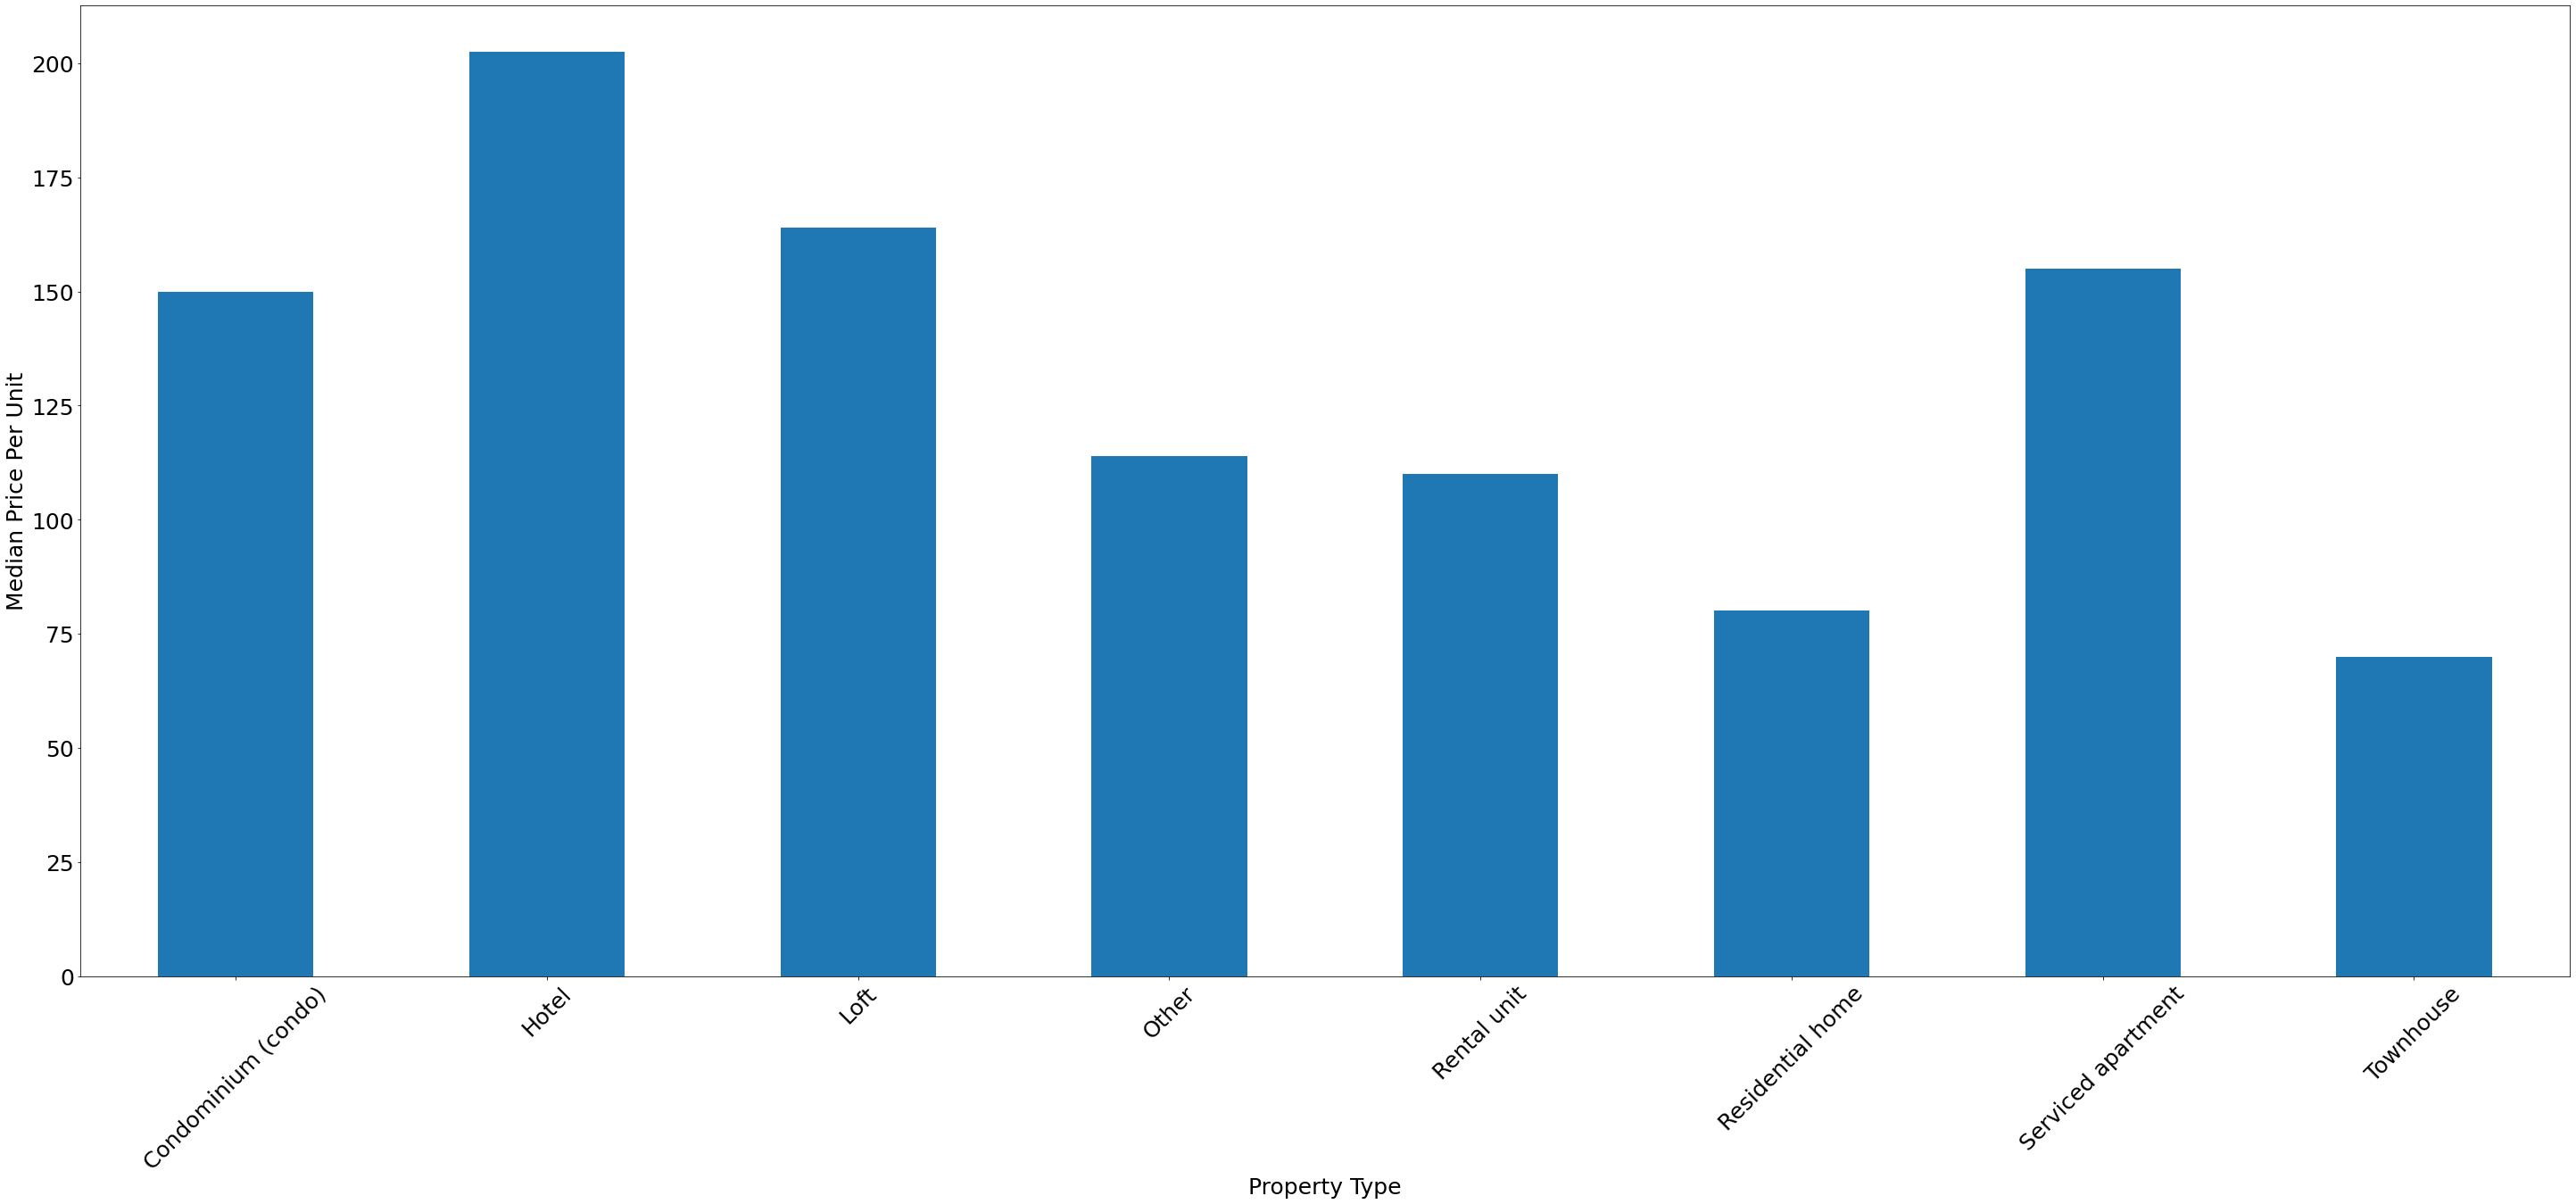

In [42]:
plt.figure(figsize=(50,20))
df.groupby('property_type')['price'].median().plot(kind='bar')
plt.xlabel('Property Type', fontsize=25)
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25)
plt.ylabel('Median Price Per Unit', fontsize=25)

In [43]:
df.groupby('property_type')['price'].median()

property_type
Condominium (condo)    150.0
Hotel                  202.5
Loft                   164.0
Other                  114.0
Rental unit            110.0
Residential home        80.0
Serviced apartment     155.0
Townhouse               70.0
Name: price, dtype: float64

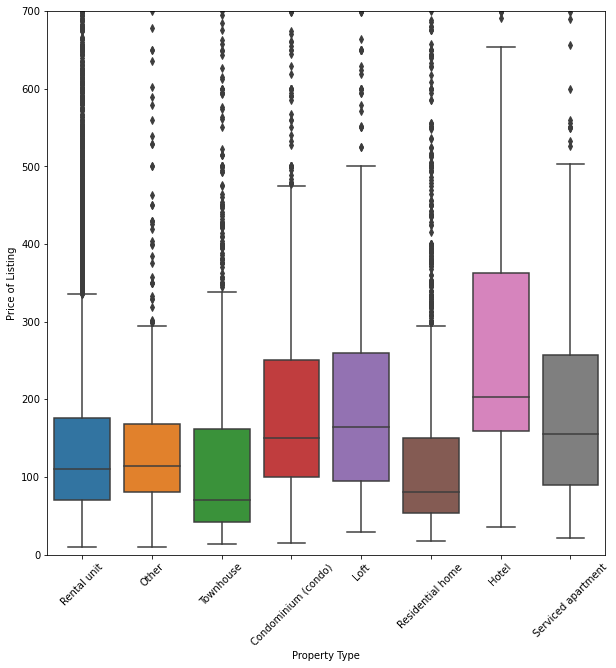

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(x='property_type', y='price', data=df)
plt.ylim(0,700)
plt.xlabel('Property Type')
plt.xticks(rotation=45)
plt.ylabel('Price of Listing')
plt.show()

Hotels have the highest median price, while townhouses have the lowest.

In [45]:
#number of listings for each property type
df['property_type'].value_counts(sort='descending')

Rental unit            26955
Residential home        3007
Townhouse               1702
Condominium (condo)     1439
Hotel                   1010
Loft                     904
Other                    772
Serviced apartment       363
Name: property_type, dtype: int64

Text(0, 0.5, 'Median Price Per Unit')

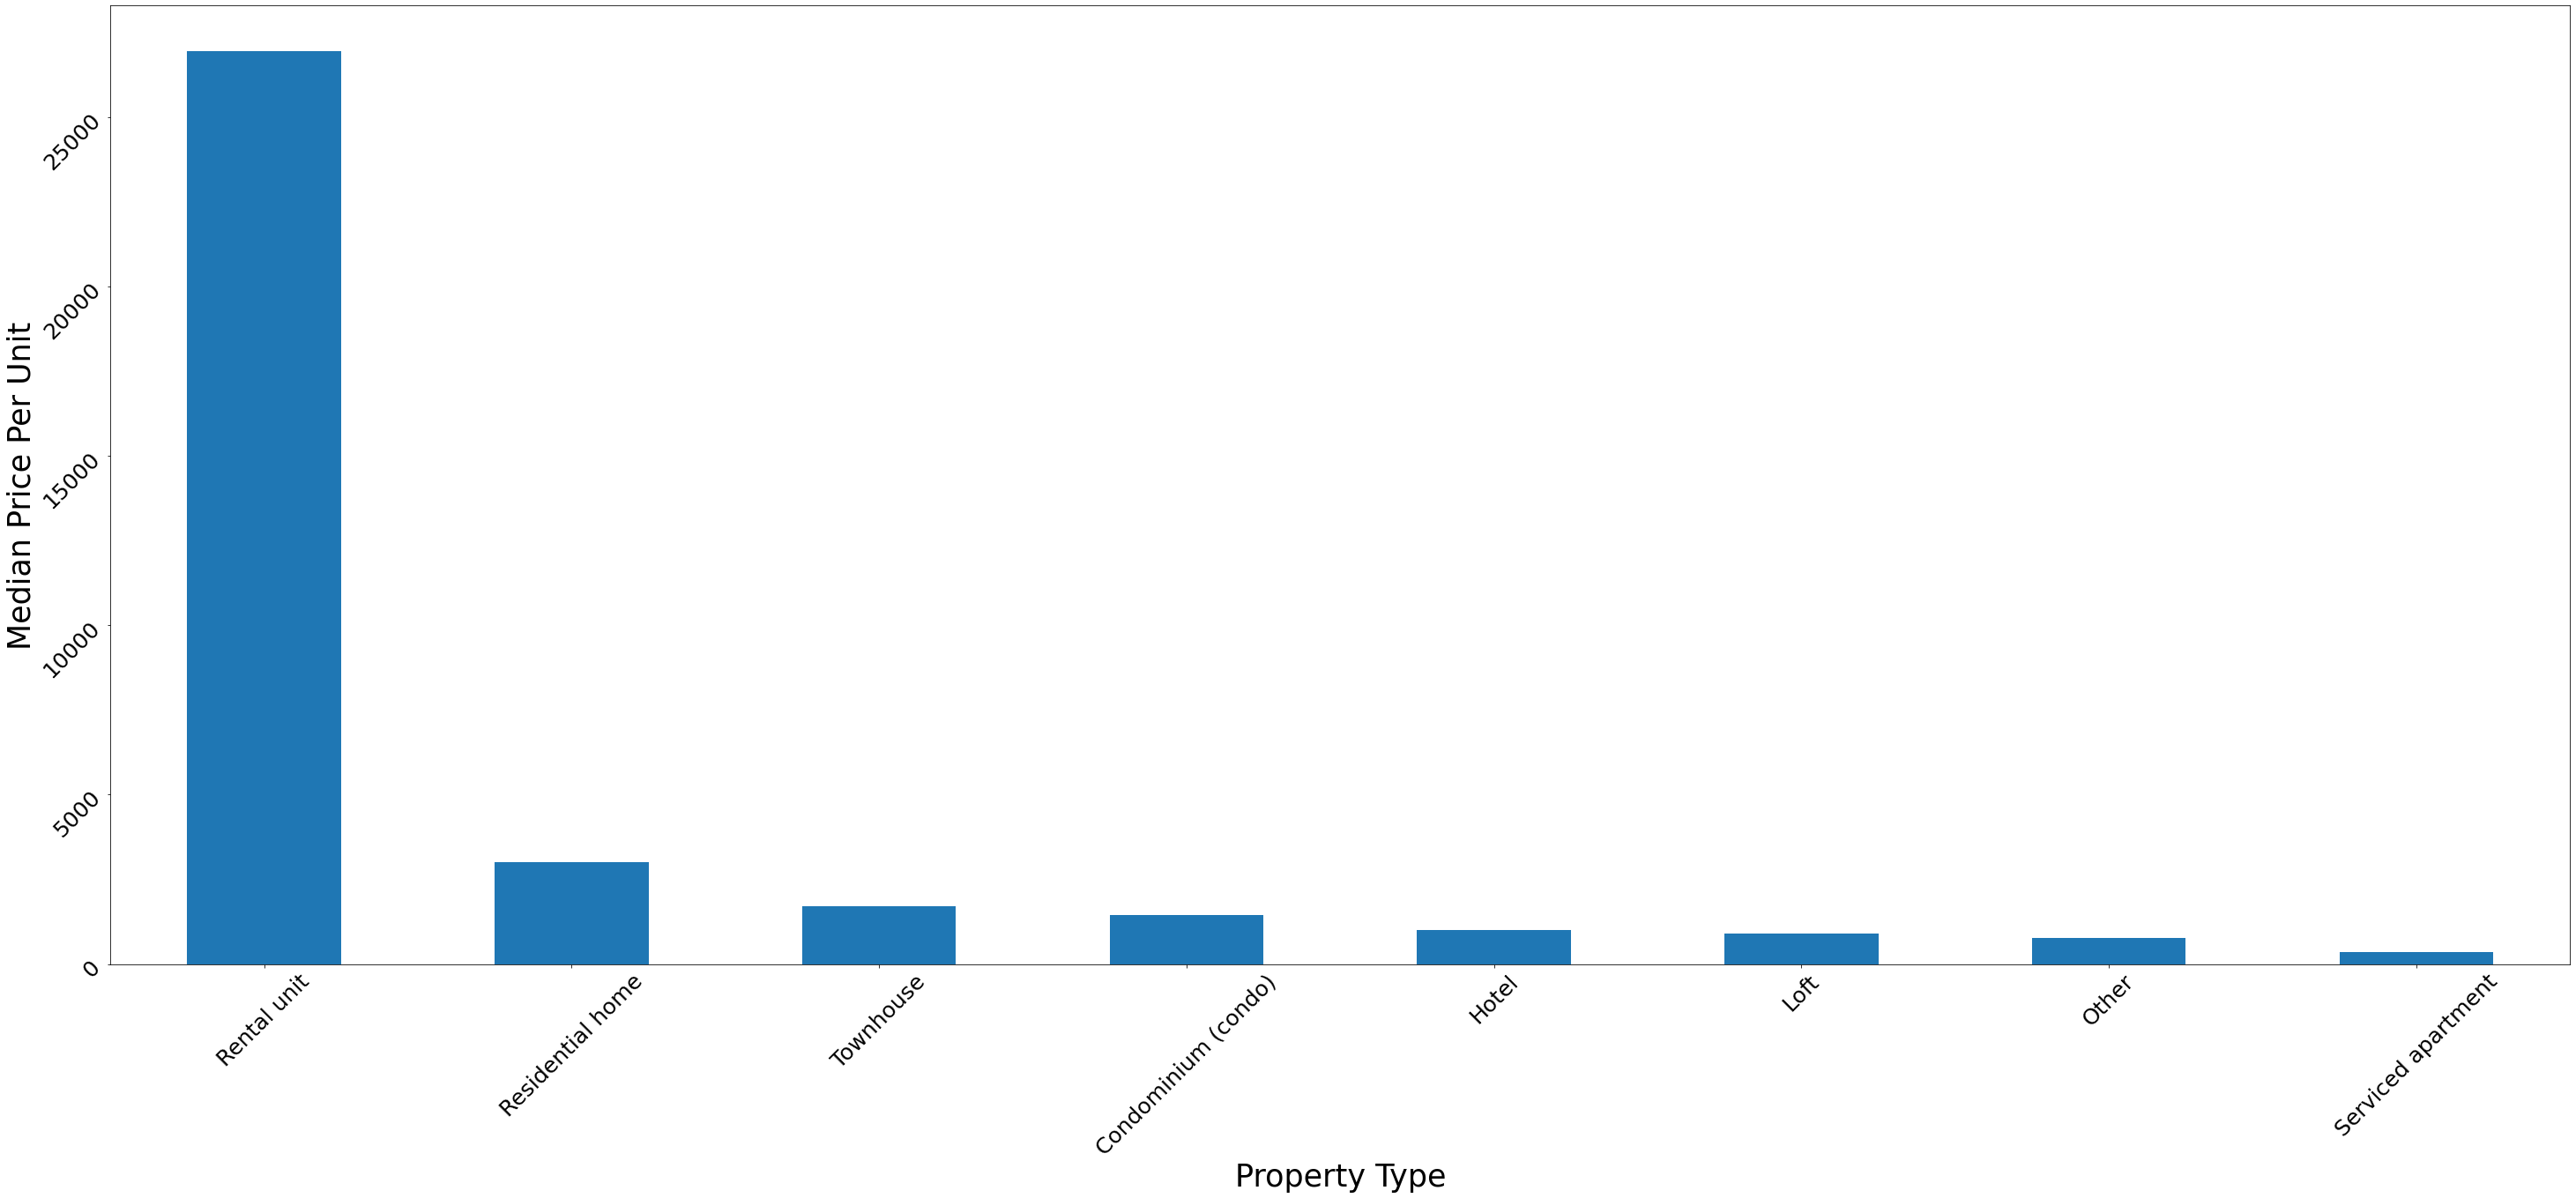

In [46]:
plt.figure(figsize=(50,20))
df['property_type'].value_counts().plot(kind='bar')
plt.xlabel('Property Type', fontsize=35)
plt.xticks(fontsize=25, rotation=45)
plt.yticks(fontsize=25, rotation=45)
plt.ylabel('Median Price Per Unit', fontsize=35)

However, the most common property type is Rental Unit. This is followed by Residential home, Townhome, Condos, and Hotels. These make up the top five common property types. <br> The least common are Serviced Apartments.

We will do a One-Way ANOVA Test to study the relationship between property types and price of a listing.

**Null hypothesis:** The mean prices of each of the listings under the various room types will be equal, signifying that the room type of a listing does not have any affect on the price of the listing. <br>
Let's take the **alpha** as 5% (0.05).

In [47]:
rentalunit = df[df['property_type']=='Rental unit']
townhouse = df[df['property_type']=='Townhouse']
condo = df[df['property_type']=='Condominium (condo)']
loft = df[df['property_type']=='Loft']
reshome = df[df['property_type']=='Residential home']
hotel = df[df['property_type']=='Hotel']
apt = df[df['property_type']=='Serviced apartment']
other = df[df['property_type']=='Other']

Now, we're going to conduct an ANOVA test and find the F-statitistic.<br>
From the LinkedIn Learning course from the curriculum: "The F-statistic measures how much, on average, each parameter contributes to the growth of the $R^2$, compared to a random model vector."

In [48]:
stats.f_oneway(rentalunit['price'], townhouse['price'], condo['price'], loft['price'], reshome['price'], hotel['price'], apt['price'], other['price'])

F_onewayResult(statistic=110.23534545626333, pvalue=1.3392722245671967e-160)

Thus, the **F-statistic** is 110.2353 and the **p-value** is 1.3393<br>
The p-value is greater than the alpha = 5% = 0.05. <br>
Thus, this means that the null hypothesis cannot be rejected, i.e. the property type of the listing does not have an effect on the price of a listing.

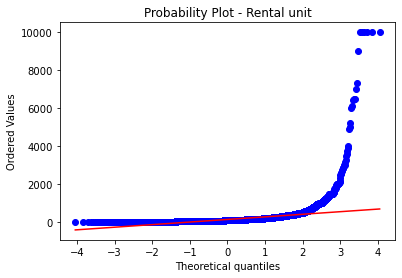

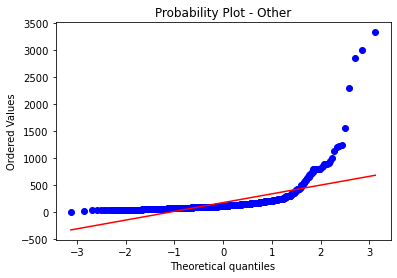

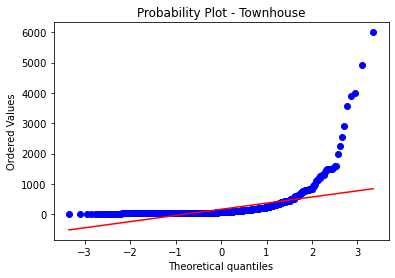

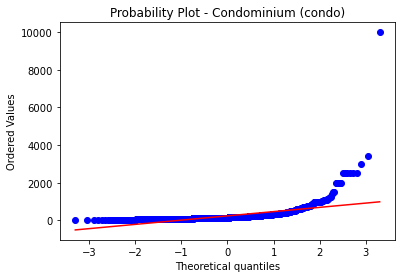

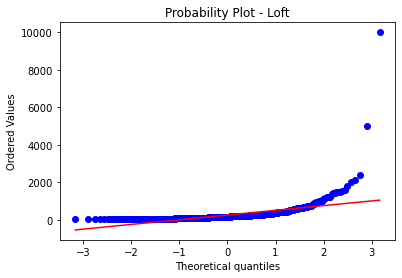

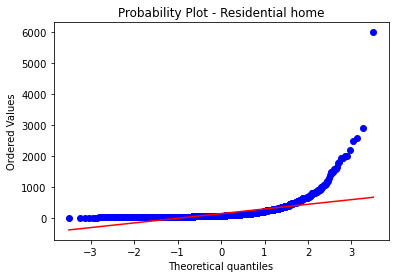

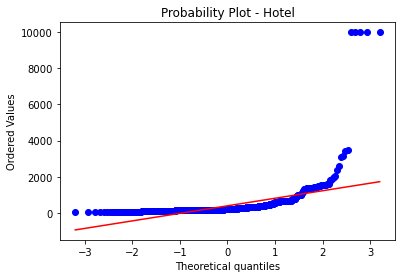

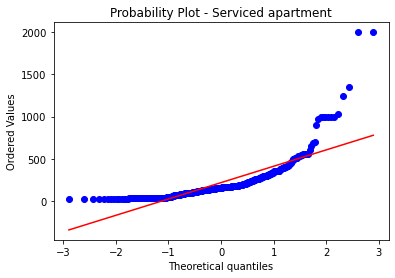

In [49]:
unique_ptype = df['property_type'].unique()
for ptype in unique_ptype:
    stats.probplot(df[df['property_type'] == ptype]['price'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  ptype)
    plt.show()

<hr align="center">

## Price and Bathrooms, Bedrooms, Number of Beds, and the Number of People A Listing Can Accommodate

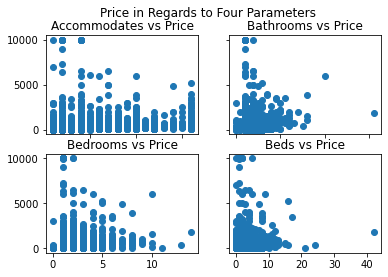

In [50]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

fig.suptitle('Price in Regards to Four Parameters')
ax1.scatter(df['accommodates'], df['price'])
ax1.set_title('Accommodates vs Price')
ax2.scatter(df['bathrooms'], df['price'])
ax2.set_title('Bathrooms vs Price')
ax3.scatter(df['bedrooms'], df['price'])
ax3.set_title('Bedrooms vs Price')
ax4.scatter(df['beds'], df['price'])
ax4.set_title('Beds vs Price')

for ax in fig.get_axes():
    ax.label_outer()

From the heatmap above, we were able to observe the following, in particular regards to the "Price" column: <br>
• 0.3 = Price-Accomodates<br>
• 0.2 = Price-Bathrooms<br>
• 0.3 = Price-Bedrooms<br>
• 0.2 = Price-Beds<br>

The following observations can be made from seeing the above visualizations: <br>
• The number of beds does not seem to have an effect on the price <br>
• The number of bathrooms also does not seem to have a significant effect on price either <br>

array([[<AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'beds'}>]], dtype=object)

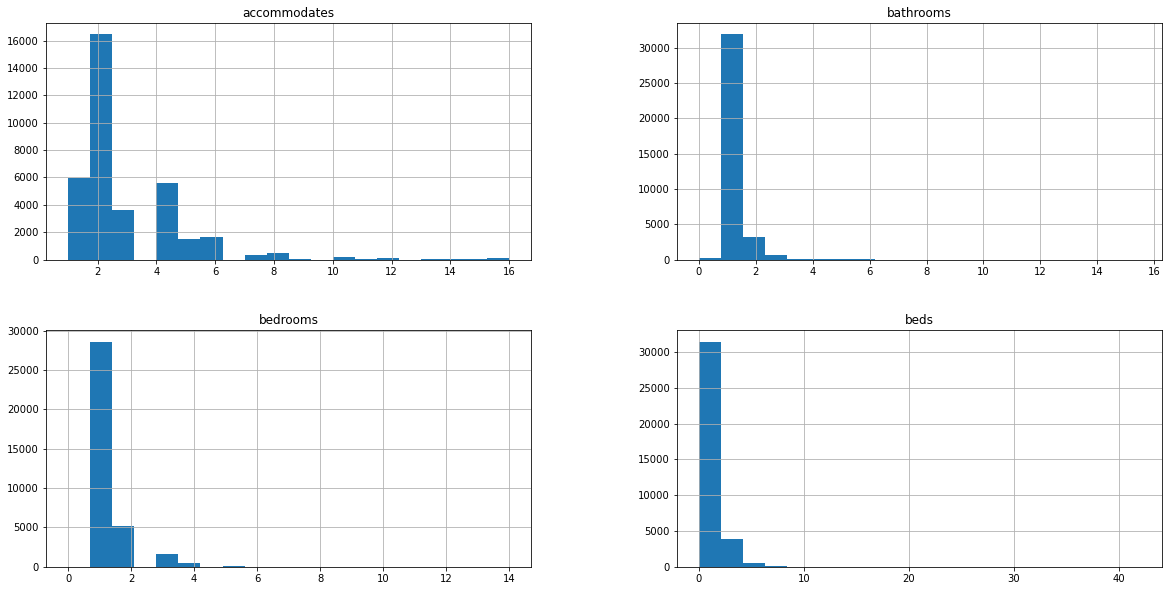

In [51]:
df[['accommodates', 'bathrooms','bedrooms','beds']].hist(bins=20, figsize=(20,10))

The most common number of bedrooms appears to be 1 and the most common bathrooms appears to be between 1 and 2. 
<br>
The most common number of beds appears to be between 0 and 5. 
<br>
The most common number of people a listing can accommodate is less than 3.

### Number of People Accommodated & Price

In this section, we're going to use the Predictive Power Score package.

In [52]:
pps.score(df, 'accommodates', 'price')

{'x': 'accommodates',
 'y': 'price',
 'ppscore': 0.03869911883022514,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 103.1478,
 'model_score': 99.15607103072371,
 'model': DecisionTreeRegressor()}

The predictive power score is 0.0387<br><br>
According to the documentation for the Predictive Power Score package (https://github.com/8080labs/ppscore): A score of 0 means that the column $x$ cannot predict the column $y$ better than a naive baseline model, whereas a score of 1 means that the column $x$ can perfectly predict the column $y$ given the model.


<hr align="center">

## Amenities & Price

The amenities column contains a long list of free text for each row. Nearly all rows have unique answers. As such, we are looking at the top 10 most common amenities. 

In [53]:
from ast import literal_eval


df['amenities'] = df['amenities'].apply(lambda row: literal_eval(row))

In [54]:
#Separating all the individual amenities

all_amenities = [value for sublist in df['amenities'] for value in sublist]

from collections import Counter

result = Counter(all_amenities)

amens = result.most_common(10)

In [55]:
amens

[('Wifi', 34911),
 ('Long term stays allowed', 33348),
 ('Heating', 32715),
 ('Kitchen', 32468),
 ('Essentials', 32270),
 ('Smoke alarm', 31892),
 ('Air conditioning', 30327),
 ('Hangers', 27333),
 ('Carbon monoxide alarm', 26780),
 ('Hair dryer', 22863)]

These are the top 10 most common amenities listed among all the units in the dataset.

Below is a DataFrame of the amenities offered in every row.

In [56]:
amenities_df = pd.DataFrame(df['amenities'].to_list())

In [57]:
price = df['price']
amenities_df.insert(0, "Price", price)

In [58]:
amenities_df.head()

,Price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
0,150.0,Free street parking,Heating,TV,Dedicated workspace,Cleaning before checkout,Keypad,Luggage dropoff allowed,Stove,Kitchen,Baking sheet,Air conditioning,Oven,Essentials,Coffee maker,Smoke alarm,Fire extinguisher,Cooking basics,Wifi,Ethernet connection,Bathtub,Iron,Paid parking off premises,Hair dryer,Long term stays allowed,Hot water,Bed linens,Extra pillows and blankets,Hangers,Carbon monoxide alarm,Refrigerator,Dishes and silverware,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,76.0,Dedicated workspace,Iron,Stove,Hair dryer,Fire extinguisher,Oven,Cable TV,Essentials,Heating,Children’s books and toys,Microwave,Cooking basics,Baby safety gates,Air conditioning,Smoke alarm,Free street parking,TV with standard cable,Free parking on premises,Bathtub,Hot water,Lockbox,Kitchen,Coffee maker,Extra pillows and blankets,Hangers,High chair,Wifi,Luggage dropoff allowed,Refrigerator,Pack ’n Play/travel crib,Carbon monoxide alarm,Dishes and silverware,Long term stays allowed,Bed linens,Shampoo,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,275.0,Dryer,BBQ grill,Kitchen,Long term stays allowed,Air conditioning,Washer,Smoke alarm,TV with standard cable,Wifi,Cable TV,Outdoor furniture,Outdoor dining area,Carbon monoxide alarm,Heating,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,68.0,Hot water,Bed linens,Extra pillows and blankets,Heating,Smoke alarm,Hangers,TV,Paid parking off premises,Free street parking,Shampoo,Air conditioning,Wifi,Luggage dropoff allowed,Iron,Lock on bedroom door,Refrigerator,Essentials,Hair dryer,Microwave,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,75.0,Hot water,Smoke alarm,Paid parking off premises,Heating,Free street parking,Dedicated workspace,Shampoo,Carbon monoxide alarm,Fire extinguisher,Air conditioning,Wifi,Elevator,Host greets you,Breakfast,Essentials,Hair dryer,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


### "Wifi" & Price

**Null hypothesis:** The mean prices of listings providing wifi and without wifi will be equal, signifying that the provision of wifi does not have an effect on the price of a listing.<br>
Let's take the **alpha** as 5% (0.05).

In [59]:
w_wifi = amenities_df[amenities_df.isin(['Wifi']).any(axis=1)]

In [60]:
wo_wifi = amenities_df[~amenities_df.isin(['Wifi']).any(axis=1)]

In [61]:
#calculating the variances
print(np.var(w_wifi['Price']), np.var(wo_wifi['Price']))

87468.1763606565 176839.7997741677


In [62]:
#calculating the ratio of the larger variance to the smaller variance
np.var(wo_wifi['Price'])/np.var(w_wifi['Price'])

2.0217615952687327

The ratio of the larger variance to the smaller variance is less than 4. Thus, we can assume that the population variances are equal. So, we can use the Student T-Test.

In [63]:
#computing t-statistic
stats.ttest_ind(a=w_wifi['Price'], b=wo_wifi['Price'], equal_var=True)

Ttest_indResult(statistic=-1.375898028453564, pvalue=0.16886172958913667)

Thus, the **t-statistic** is 1.3759 and the **p-value** is 0.1689<br>
The p-value is more than the alpha = 5% = 0.05. <br>
Thus, this means that the null hypothesis cannot be rejected, i.e. the provision of wifi does not have an effect on the price of a listing.

### "Long term stays allowed" & Price

**Null hypothesis:** The mean prices of listings allowing long-term stays and not allowing long-term stays, signifying that the allowance of long-term stays does not have an effect on the price of a listing.<br>
Let's take the **alpha** as 5% (0.05).

In [64]:
ltsa = amenities_df[amenities_df.isin(['Long term stays allowed']).any(axis=1)]

In [65]:
wo_ltsa = amenities_df[~amenities_df.isin(['Long term stays allowed']).any(axis=1)]

In [66]:
#calculating the variances
print(np.var(ltsa['Price']), np.var(wo_ltsa['Price']))

92723.52004679843 64399.209742654246


In [67]:
#calculating the ratio of the larger variance to the smaller variance
np.var(ltsa['Price'])/np.var(wo_ltsa['Price'])

1.4398238800962153

The ratio of the larger variance to the smaller variance is less than 4. Thus, we can assume that the population variances are equal. So, we can use the Student T-Test.

In [68]:
#computing t-statistic
stats.ttest_ind(a=ltsa['Price'], b=wo_ltsa['Price'], equal_var=True)

Ttest_indResult(statistic=2.3775881424754224, pvalue=0.017431446832270794)

Thus, the **t-statistic** is 2.3776 and the **p-value** is 0.0174<br>
The p-value is less than the alpha = 5% = 0.05. <br>
Thus, this means that the null hypothesis can be rejected, i.e. the allowance of long-term stays does have an effect on the price of a listing!

### "Heating" & Price

**Null hypothesis:** The mean prices of listings providing heating and without heating, signifying that the providing heating does not have an effect on the price of a listing.<br>
Let's take the **alpha** as 5% (0.05).

In [69]:
heating = amenities_df[amenities_df.isin(['Heating']).any(axis=1)]

In [70]:
wo_heating = amenities_df[~amenities_df.isin(['Heating']).any(axis=1)]

In [71]:
#calculating the variances
print(np.var(heating['Price']), np.var(wo_heating['Price']))

93300.93863409615 64233.924474533116


In [72]:
#calculating the ratio of the larger variance to the smaller variance
np.var(heating['Price'])/np.var(wo_heating['Price'])

1.4525181109101821

The ratio of the larger variance to the smaller variance is less than 4. Thus, we can assume that the population variances are equal. So, we can use the Student T-Test.

In [73]:
#computing t-statistic
stats.ttest_ind(a=heating['Price'], b=wo_heating['Price'], equal_var=True)

Ttest_indResult(statistic=1.1459159182616823, pvalue=0.2518375294946811)

Thus, the **t-statistic** is 1.1459 and the **p-value** is 0.2518<br>
The p-value is more than the alpha = 5% = 0.05. <br>
Thus, this means that the null hypothesis cannot be rejected, i.e. the provision of heating in a listing does not have an effect on the price of a listing.

### "Kitchen" & Price

**Null hypothesis:** The mean prices of listings providing a kitchen and without a kitchen, signifying that the provision of a kitchen does not have an effect on the price of a listing.<br>
Let's take the **alpha** as 5% (0.05).

In [74]:
kitchen = amenities_df[amenities_df.isin(['Kitchen']).any(axis=1)]

In [75]:
wo_kitchen = amenities_df[~amenities_df.isin(['Kitchen']).any(axis=1)]

In [76]:
#calculating the variances
print(np.var(kitchen['Price']), np.var(wo_kitchen['Price']))

70018.92591570813 270318.0245793221


In [77]:
#calculating the ratio of the larger variance to the smaller variance
np.var(wo_kitchen['Price'])/np.var(kitchen['Price'])

3.8606422627039847

The ratio of the larger variance to the smaller variance is less than 4. Thus, we can assume that the population variances are equal. So, we can use the Student T-Test.

In [78]:
#computing t-statistic
stats.ttest_ind(a=kitchen['Price'], b=wo_kitchen['Price'], equal_var=True)

Ttest_indResult(statistic=-6.654776636459039, pvalue=2.8777640163281564e-11)

Thus, the **t-statistic** is -6.6548 and the **p-value** is 2.8778e-11<br>
The p-value is less than the alpha = 5% = 0.05. <br>
Thus, this means that the null hypothesis can be rejected, i.e. the provision of a kitchen in a listing has an effect on the price of a listing!

### "Essentials" & Price

In [79]:
essentials = amenities_df[amenities_df.isin(['Essentials']).any(axis=1)]

In [80]:
wo_essentials = amenities_df[~amenities_df.isin(['Essentials']).any(axis=1)]

In [81]:
#calculating the variances
print(np.var(essentials['Price']), np.var(wo_essentials['Price']))

83834.92660357493 146234.75041042062


In [82]:
#calculating the ratio of the larger variance to the smaller variance
np.var(wo_essentials['Price'])/np.var(essentials['Price'])

1.7443177483999228

The ratio of the larger variance to the smaller variance is less than 4. Thus, we can assume that the population variances are equal. So, we can use the Student T-Test.

In [83]:
#computing t-statistic
stats.ttest_ind(a=essentials['Price'], b=wo_essentials['Price'], equal_var=True)

Ttest_indResult(statistic=-1.4664942947712833, pvalue=0.14252237287258523)

Thus, the **t-statistic** is -1.4665 and the **p-value** is 0.1425<br>
The p-value is more than the alpha = 5% = 0.05. <br>
Thus, this means that the null hypothesis cannot be rejected, i.e. the provision of "essentials" in a listing doesn't have an effect on the price of a listing.

### "Smoke alarm" & Price

**Null hypothesis:** The mean prices of listings having a smoke alarm and without a smoke alarm will be equal, signifying that the provision of a smoke alarm does not have an effect on the price of a listing.<br>
Let's take the **alpha** as 5% (0.05).

In [84]:
smokealarm = amenities_df[amenities_df.isin(['Smoke alarm']).any(axis=1)]

In [85]:
wo_smokealarm = amenities_df[~amenities_df.isin(['Smoke alarm']).any(axis=1)]

In [86]:
#calculating the variances
print(np.var(smokealarm['Price']), np.var(wo_smokealarm['Price']))

77120.24896008337 191009.99707972532


In [87]:
#calculating the ratio of the larger variance to the smaller variance
np.var(wo_smokealarm['Price'])/np.var(smokealarm['Price'])

2.4767813856331053

The ratio of the larger variance to the smaller variance is less than 4. Thus, we can assume that the population variances are equal. So, we can use the Student T-Test.

In [88]:
#computing t-statistic
stats.ttest_ind(a=smokealarm['Price'], b=wo_smokealarm['Price'], equal_var=True)

Ttest_indResult(statistic=0.32445687086934105, pvalue=0.7455940469372175)

Thus, the **t-statistic** is 0.3245 and the **p-value** is 0.7456<br>
The p-value is more than the alpha = 5% = 0.05. <br>
Thus, this means that the null hypothesis cannot be rejected, i.e. the provision of a smoke alarm in a listing doesn't have an effect on the price of a listing.

### "Air conditioning" & Price

**Null hypothesis:** The mean prices of listings that have air conditioning and without air conditioning will be equal, signifying that the provision of air conditioning does not have an effect on the price of a listing.<br>
Let's take the **alpha** as 5% (0.05).

In [89]:
aircon = amenities_df[amenities_df.isin(['Air conditioning']).any(axis=1)]

In [90]:
wo_aircon = amenities_df[~amenities_df.isin(['Air conditioning']).any(axis=1)]

In [91]:
#calculating the variances
print(np.var(aircon['Price']), np.var(wo_aircon['Price']))

92958.77959754625 75240.08325328489


In [92]:
#calculating the ratio of the larger variance to the smaller variance
np.var(aircon['Price'])/np.var(wo_aircon['Price'])

1.2354954377790084

The ratio of the larger variance to the smaller variance is less than 4. Thus, we can assume that the population variances are equal. So, we can use the Student T-Test.

In [93]:
#computing t-statistic
stats.ttest_ind(a=aircon['Price'], b=wo_aircon['Price'], equal_var=True)

Ttest_indResult(statistic=13.240353280859647, pvalue=6.3566587821915635e-40)

Thus, the **t-statistic** is 13.2404 and the **p-value** is 6.3567<br>
The p-value is more than the alpha = 5% = 0.05. <br>
Thus, this means that the null hypothesis cannot be rejected, i.e. the provision of air conditioning in a listing doesn't have an effect on the price of a listing.

### "Hangers" & Price

**Null hypothesis:** The mean prices of listings that provide hangers and without hangers will be equal, signifying that the provision of hangers does not have an effect on the price of a listing.<br>
Let's take the **alpha** as 5% (0.05).

In [94]:
hangers = amenities_df[amenities_df.isin(['Hangers']).any(axis=1)]

In [95]:
wo_hangers = amenities_df[~amenities_df.isin(['Hangers']).any(axis=1)]

In [96]:
#calculating the variances
print(np.var(hangers['Price']), np.var(wo_hangers['Price']))

78079.31009625309 129033.9019900546


In [97]:
#calculating the ratio of the larger variance to the smaller variance
np.var(wo_hangers['Price'])/np.var(hangers['Price'])

1.6526004370554337

The ratio of the larger variance to the smaller variance is less than 4. Thus, we can assume that the population variances are equal. So, we can use the Student T-Test.

In [98]:
#computing t-statistic
stats.ttest_ind(a=hangers['Price'], b=wo_hangers['Price'], equal_var=True)

Ttest_indResult(statistic=3.547865099157011, pvalue=0.0003888588279525517)

Thus, the **t-statistic** is 3.5479 and the **p-value** is 0.0004<br>
The p-value is less than the alpha = 5% = 0.05. <br>
Thus, this means that the null hypothesis can be rejected, i.e. the provision of hangers in a listing does have an effect on the price of a listing!

### "Carbon monoxide alarm" & Price

**Null hypothesis:** The mean prices of listings that contain carbon monoxide alarms and listings that don't will be equal, signifying that the provision of these carbon monoxide alarms does not have an effect on the price of a listing.<br>
Let's take the **alpha** as 5% (0.05).

In [99]:
co = amenities_df[amenities_df.isin(['Carbon monoxide alarm']).any(axis=1)]

In [100]:
wo_co = amenities_df[~amenities_df.isin(['Carbon monoxide alarm']).any(axis=1)]

In [101]:
#calculating the variances
print(np.var(co['Price']), np.var(wo_co['Price']))

82187.59716614414 114226.54733366158


In [102]:
#calculating the ratio of the larger variance to the smaller variance
np.var(wo_co['Price'])/np.var(co['Price'])

1.3898270696824238

The ratio of the larger variance to the smaller variance is less than 4. Thus, we can assume that the population variances are equal. So, we can use the Student T-Test.

In [103]:
#computing t-statistic
stats.ttest_ind(a=co['Price'], b=wo_co['Price'], equal_var=True)

Ttest_indResult(statistic=4.3545582306998485, pvalue=1.3370179262338572e-05)

Thus, the **t-statistic** is 4.3546 and the **p-value** is 1.3370<br>
The p-value is more than the alpha = 5% = 0.05. <br>
Thus, this means that the null hypothesis cannot be rejected, i.e. the provision of hangers in a listing does not have an effect on the price of a listing.

### "Hair dryer" & Price

**Null hypothesis:** The mean prices of listings providing a hair dryer and without a hair dryer will be equal, signifying that the provision of a hair dryer does not have an effect on the price of a listing.<br>
Let's take the **alpha** as 5% (0.05).

In [104]:
hd = amenities_df[amenities_df.isin(['Hair dryer']).any(axis=1)]

In [105]:
wo_hd = amenities_df[~amenities_df.isin(['Hair dryer']).any(axis=1)]

In [106]:
#calculating the variances
print(np.var(hd['Price']), np.var(wo_hd['Price']))

58127.10753658575 146061.4618218102


In [107]:
#calculating the ratio of the larger variance to the smaller variance
np.var(wo_hd['Price'])/np.var(hd['Price'])

2.512794254038492

The ratio of the larger variance to the smaller variance is less than 4. Thus, we can assume that the population variances are equal. So, we can use the Student T-Test.

In [108]:
#computing t-statistic
stats.ttest_ind(a=hd['Price'], b=wo_hd['Price'], equal_var=True)

Ttest_indResult(statistic=6.003565227328065, pvalue=1.9486797706497917e-09)

Thus, the **t-statistic** is 6.0036 and the **p-value** is 1.9487<br>
The p-value is greater than the alpha = 5% = 0.05. <br>
Thus, this means that the null hypothesis cannot be rejected, i.e. the provision of a hair dryer does not have an effect on the price of a listing.

<hr align="center">

## Categorical Variables & Price of Listings

The data set contains many categorical columns. The following sections are divided to deal with these columns.

### Host Information & Price

The following are the categorical columns that come under this section: <br>
1. host_since <br>
2. host_response_time <br>
3. host_response_rate <br>
4. host_acceptance_rate <br>
5. host_is_superhost <br>
6. host_verifications<br>
7. calculated_host_listings_count <br>  
8. calculated_host_listings_count_entire_homes <br>
9. calculated_host_listings_count_private_rooms <br> 
10. calculated_host_listings_count_shared_rooms 

Using Predictive Power Score to calculate correlation coefficients in a way that's inclusive of categorical variables and non-linear relationships. 
(https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598)<br>
(https://medium.com/geekculture/predictive-power-score-implementation-in-python-70558bf91f45)

In [109]:
pps.predictors(df, 'price')

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,price_log,price,0.990253,regression,True,mean absolute error,103.1478,1.005400,DecisionTreeRegressor()
1,accommodates,price,0.038699,regression,True,mean absolute error,103.1478,99.156071,DecisionTreeRegressor()
2,calculated_host_listings_count_private_rooms,price,0.024625,regression,True,mean absolute error,103.1478,100.607804,DecisionTreeRegressor()
3,calculated_host_listings_count_entire_homes,price,0.001870,regression,True,mean absolute error,103.1478,102.954889,DecisionTreeRegressor()
4,id,price,0.000000,regression,True,mean absolute error,103.1478,155.295500,DecisionTreeRegressor()
5,host_since,price,0.000000,regression,True,mean absolute error,103.1478,115.637405,DecisionTreeRegressor()
6,host_response_time,price,0.000000,regression,True,mean absolute error,103.1478,116.349573,DecisionTreeRegressor()
7,host_response_rate,price,0.000000,regression,True,mean absolute error,103.1478,115.409188,DecisionTreeRegressor()
8,host_acceptance_rate,price,0.000000,regression,True,mean absolute error,103.1478,116.131743,DecisionTreeRegressor()
9,host_is_superhost,price,0.000000,regression,True,mean absolute error,103.1478,117.005341,DecisionTreeRegressor()


Above, we can see that the columns **calculated_host_listings_count_entire_homes** and **calculated_host_listings_count_private_rooms** have a relationship with the target feature **price**. 
<br><br>
**calculated_host_listings_count_private_rooms** has a predictive power score of 0.02463 with **price**<br>
**calculated_host_listings_count_entire_homes** has a predictive power score of 0.00187 with **price**

#### calculated_host_listings_count_entire_homes & Price

In [110]:
df['calculated_host_listings_count_entire_homes'].value_counts().sort_values()

45         1
18        18
22        25
25        25
28        28
29        29
31        31
33        33
20        40
27        41
42        42
14        42
17        44
11        44
15        45
46        47
12        48
50        48
16        49
35        49
8         49
52        51
54        54
13        56
30        64
9         65
23        68
69        72
73        83
10        87
43        88
19        94
99        97
106      106
34       139
37       168
179      174
6        196
5        216
7        267
297      297
56       342
4        532
3        783
2       2106
0      14182
1      14987
Name: calculated_host_listings_count_entire_homes, dtype: int64

The most common number of entire homes that a host has listed is 1. <br> The least common number of entire homes that a host has listed is 45. 

<AxesSubplot:>

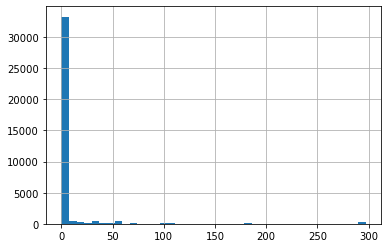

In [111]:
df['calculated_host_listings_count_entire_homes'].hist(bins=40)

#### calculated_host_listings_count_private_rooms & Price

In [112]:
df['calculated_host_listings_count_private_rooms'].value_counts().sort_values()

19        17
22        22
24        23
23        27
16        33
37        39
13        40
42        42
11        49
50        50
51        51
12        53
38        57
20        58
59        59
30        60
15        61
17        64
25        65
27        70
9         85
91        88
88        89
14        90
107      104
18       106
119      119
10       125
121      125
140      140
131      168
8        208
7        220
251      286
6        349
5        379
4        729
3       1290
2       2548
1       9460
0      18504
Name: calculated_host_listings_count_private_rooms, dtype: int64

The most common number of private rooms that a host has listed is 0. <br> The least common number of private rooms that a host has listed is 19. 

<AxesSubplot:>

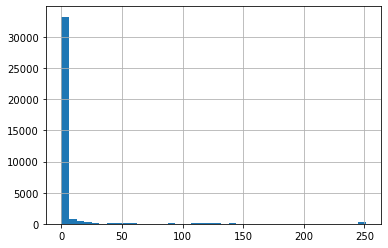

In [113]:
df['calculated_host_listings_count_private_rooms'].hist(bins=40)

#### host_is_superhost & Price

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

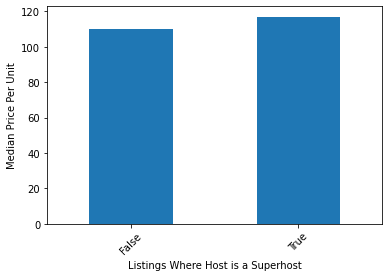

In [114]:
df.groupby('host_is_superhost')['price'].median().plot(kind='bar')
plt.xlabel('Listings Where Host is a Superhost', fontsize=10)
plt.ylabel('Median Price Per Unit', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10, rotation=45)

In [115]:
df.groupby('host_is_superhost')['price'].median()

host_is_superhost
False    110.0
True     117.0
Name: price, dtype: float64

The values are almost close; however, listings where the host is a superhost has a slightly higher median price.

In [116]:
df["host_is_superhost"].value_counts()

False    29561
True      6591
Name: host_is_superhost, dtype: int64

There are relatively few hosts that are superhosts.

### Room Types & Price

In [117]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

Here, we will conduct a One-Way ANOVA test. 

**Null hypothesis:** The mean prices of each of the listings under the various room types will be equal, signifying that the room type of a listing does not have any affect on the price of the listing. <br>
Let's take the **alpha** as 5% (0.05).

In [118]:
entire = df[df['room_type']=='Entire home/apt']

In [119]:
private = df[df['room_type']=='Private room']

In [120]:
hotelroom = df[df['room_type']=='Hotel room']

In [121]:
shared = df[df['room_type']=='Shared room']

Now, we're going to conduct an ANOVA test and find the F-statitistic.

In [122]:
stats.f_oneway(entire['price'], private['price'], hotelroom['price'], shared['price'])

F_onewayResult(statistic=423.8934110879893, pvalue=1.1257240702757154e-270)

Thus, the **F-statistic** is 423.8934 and the **p-value** is 1.1257<br>
The p-value is greater than the alpha = 5% = 0.05. <br>
Thus, this means that the null hypothesis cannot be rejected, i.e. the property type of the listing does not have an effect on the price of a listing.

### Bathroom Types & Price

In [123]:
df['bathroom_type'].unique()

array(['Private', 'Shared'], dtype=object)

Let's conduct a two-sample T-test.

**Null hypothesis:** The mean prices of listings of the two different bathroom types will be equal, signifying that the the bathroom type does not have an effect on the price of a listing.<br>
Let's take the **alpha** as 5% (0.05).

In [124]:
private = df[df['bathroom_type']=='Private']
shared = df[df['bathroom_type']=='Shared']

In [125]:
#calculating the variances
print(np.var(private['price']), np.var(shared['price']))

103337.57591906002 51933.208340341254


In [126]:
#calculating the ratio of the larger variance to the smaller variance
np.var(private['price'])/np.var(shared['price'])

1.9898169056269976

The ratio of the larger variance to the smaller variance is less than 4. Thus, we can assume that the population variances are equal. So, we can use the Student T-Test.

In [127]:
#computing t-statistic
stats.ttest_ind(a=private['price'], b=shared['price'], equal_var=True)

Ttest_indResult(statistic=33.52650194651591, pvalue=1.0503953792320311e-242)

Thus, the **t-statistic** is 33.5265 and the **p-value** is 1.0504e-242<br>
The p-value is less than the alpha = 5% = 0.05. <br>
Thus, this means that the null hypothesis can be rejected, i.e. the bathroom type available in a listing has an effect on the price of a listing!

### Availability of Listings & Price

#### has_availability & Price

**has_availability** is a Boolean column.

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

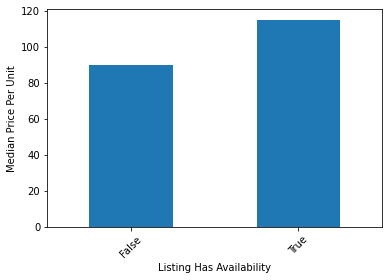

In [128]:
df.groupby('has_availability')['price'].median().plot(kind='bar')
plt.xlabel('Listing Has Availability', fontsize=10)
plt.ylabel('Median Price Per Unit', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10, rotation=45)

The median price is higher for listings that have availability.

#### availability_30, availability_60, availability_90, availability_365 & Price

From the heatmap showing linear correlation in the beginning of this notebook, we know that **availability_30, availability_60, availability_90** have a positive correlation of 0.1 with **price**.

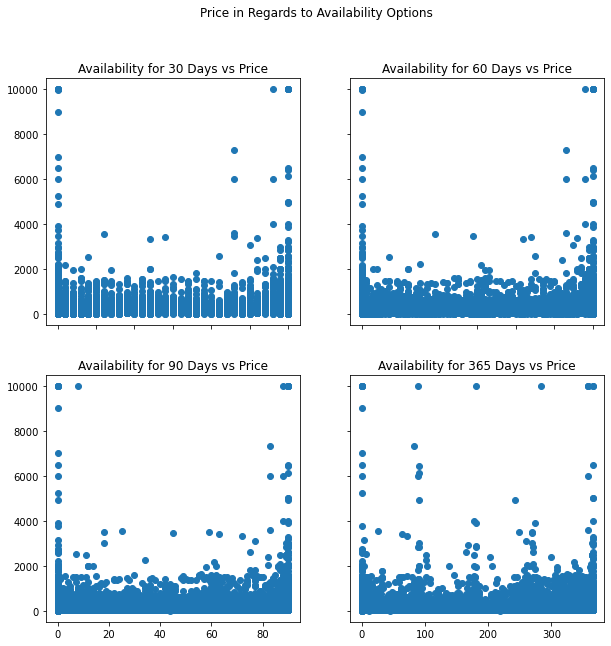

In [129]:
'''fig, axes = plt.subplots(figsize=(8,8),nrows=2, ncols=2)

#ax2=plt.subplot(2,2,2)
df.groupby("availability_30")["price"].median().scatter(ax=axes[0,0], kind='scatter')
df.groupby("availability_60")['price'].median().plot(ax=axes[0,1], kind='scatter')
df.groupby("availability_90")['price'].median().plot(ax=axes[1,0], kind='scatter')
df.groupby("availability_360")['price'].median().plot(ax=axes[1,1], kind='scatter')'''


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

fig.set_figheight(10)
fig.set_figwidth(10)

fig.suptitle('Price in Regards to Availability Options')
ax1.scatter(df['availability_30'], df['price'])
ax1.set_title('Availability for 30 Days vs Price')
ax2.scatter(df['availability_60'], df['price'])
ax2.set_title('Availability for 60 Days vs Price')
ax3.scatter(df['availability_90'], df['price'])
ax3.set_title('Availability for 90 Days vs Price')
ax4.scatter(df['availability_365'], df['price'])
ax4.set_title('Availability for 365 Days vs Price')

for ax in fig.get_axes():
    ax.label_outer()

### instant_bookable & Price

**instant_bookable** is a Boolean column.

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

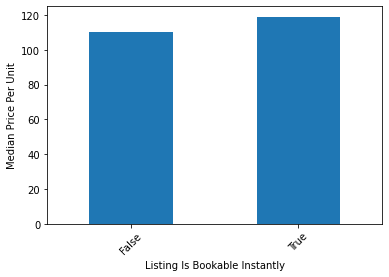

In [130]:
df.groupby('instant_bookable')['price'].median().plot(kind='bar')
plt.xlabel('Listing Is Bookable Instantly', fontsize=10)
plt.ylabel('Median Price Per Unit', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10, rotation=45)

The median price is higher for listings that are instantly bookable.

## Reviews & Price

array([[<AxesSubplot:title={'center':'review_scores_rating'}>,
        <AxesSubplot:title={'center':'review_scores_accuracy'}>,
        <AxesSubplot:title={'center':'review_scores_cleanliness'}>],
       [<AxesSubplot:title={'center':'review_scores_checkin'}>,
        <AxesSubplot:title={'center':'review_scores_communication'}>,
        <AxesSubplot:title={'center':'review_scores_location'}>],
       [<AxesSubplot:title={'center':'review_scores_value'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

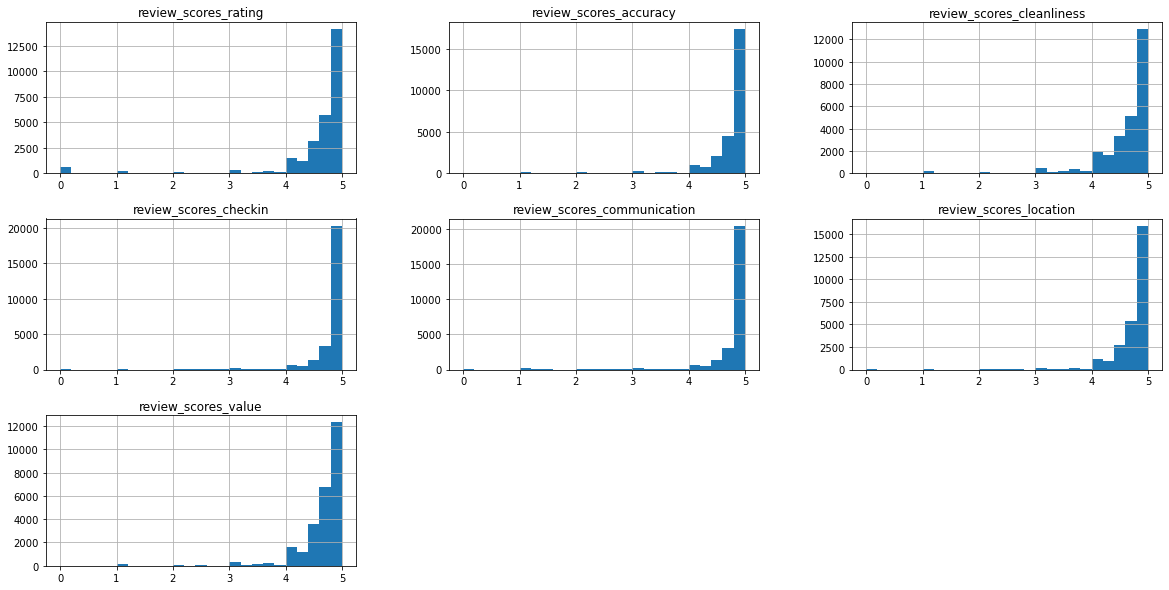

In [131]:
df[['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].hist(bins=25, figsize=(20,10))

Most of the reviews seem to lie between 4 and 5, particularly above 4.8.

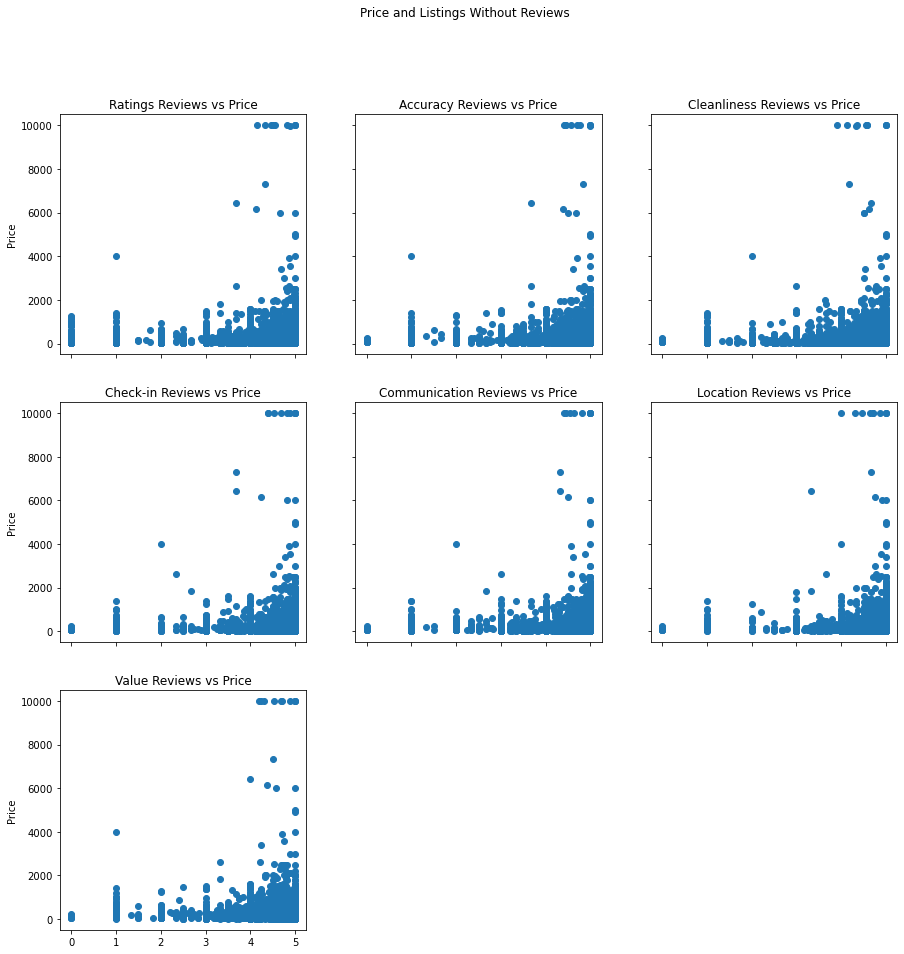

In [132]:
fig, ax = plt.subplots(figsize=(15,15))

fig.suptitle('Price and Listings Without Reviews')

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax1.scatter(df['review_scores_rating'], df['price'])
ax1.set_title('Ratings Reviews vs Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot2grid((3, 3), (0, 1))
ax2.scatter(df['review_scores_accuracy'], df['price'])
ax2.set_title('Accuracy Reviews vs Price')
ax2.set_ylabel('Price')

ax3 = plt.subplot2grid((3, 3), (0, 2))
ax3.scatter(df['review_scores_cleanliness'], df['price'])
ax3.set_title('Cleanliness Reviews vs Price')
ax3.set_ylabel('Price')

ax4 = plt.subplot2grid((3, 3), (1, 0))
ax4.scatter(df['review_scores_checkin'], df['price'])
ax4.set_title('Check-in Reviews vs Price')
ax4.set_ylabel('Price')

ax5 = plt.subplot2grid((3, 3), (1, 1))
ax5.scatter(df['review_scores_communication'], df['price'])
ax5.set_title('Communication Reviews vs Price')
ax5.set_ylabel('Price')

ax6 = plt.subplot2grid((3, 3), (1, 2))
ax6.scatter(df['review_scores_location'], df['price'])
ax6.set_title('Location Reviews vs Price')
ax6.set_ylabel('Price')

ax7 = plt.subplot2grid((3, 3), (2, 0))
ax7.scatter(df['review_scores_value'], df['price'])
ax7.set_title('Value Reviews vs Price')
ax7.set_ylabel('Price')

for ax in fig.get_axes():
    ax.label_outer()


With a few exceptions, listings with higher prices seem to have higher ratings. However, other than that, there doesn't seem to be much of a relationship. 

Now, it is also important to note that there are missing values in the reviews columns. This implies that some listings just weren't given reviews.

In [133]:
df[['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].isna().sum()

review_scores_rating           8837
review_scores_accuracy         9458
review_scores_cleanliness      9447
review_scores_checkin          9465
review_scores_communication    9454
review_scores_location         9469
review_scores_value            9469
dtype: int64

Note that **review_scores_rating** has the least number of missing values. <br>
Additionally, keep in mind that, other than the last two features, the rest have varying levels of missing values.

Let's look at the difference in prices for listings that have been given reviews and listings that don't have reviews.

In [134]:
#two-sample t-test between listings that have reviews and doesn't have reviews
reviews = df[['price', 'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

In [135]:
reviews.head()

,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,150.0,4.70,4.72,4.62,4.76,4.79,4.86,4.41
1,76.0,4.46,4.59,4.50,4.79,4.81,4.72,4.65
2,275.0,5.00,5.00,5.00,5.00,5.00,4.50,5.00
3,68.0,4.21,4.20,3.73,4.66,4.40,4.86,4.36
4,75.0,4.91,4.83,4.82,4.97,4.95,4.94,4.92


In [136]:
withreviews = reviews[reviews[['price', 'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].notna().any(axis=1)]
withoutreviews = reviews[reviews[['price', 'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].isna().any(axis=1)]

In [137]:
withoutreviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9471 entries, 7 to 36151
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        9471 non-null   float64
 1   review_scores_rating         634 non-null    float64
 2   review_scores_accuracy       13 non-null     float64
 3   review_scores_cleanliness    24 non-null     float64
 4   review_scores_checkin        6 non-null      float64
 5   review_scores_communication  17 non-null     float64
 6   review_scores_location       2 non-null      float64
 7   review_scores_value          2 non-null      float64
dtypes: float64(8)
memory usage: 665.9 KB


In [138]:
#do an awo-sample t-test for each category between with reviews and without reviews.
#so for review_scores_rating

Now, let's do a two-sample t-test for each column for listings with reviews and without reviews to see if there is a relationship between price and if a listing has reviews or not.

**Null hypothesis:** The mean prices of listings with reviews and without reviews will be equal, signifying that whether or not a listing has reviews does not have an effect on the price of a listing.<br>
Let's take the **alpha** as 5% (0.05).

In [139]:
#calculating the variances
print(np.var(withreviews['price']), np.var(withoutreviews['price']))

90540.80270328639 135801.47083065656


In [140]:
#calculating the ratio of the larger variance to the smaller variance
np.var(withoutreviews['price'])/np.var(withreviews['price'])

1.4998924990282567

The ratio of the larger variance to the smaller variance is less than 4. Thus, we can assume that the population variances are equal. So, we can use the Student T-Test.

In [141]:
#computing t-statistic
stats.ttest_ind(a=withreviews['price'], b=withoutreviews['price'], equal_var=True)

Ttest_indResult(statistic=-9.066875627357463, pvalue=1.2720773782110679e-19)

Thus, the **t-statistic** is -9.0669 and the **p-value** is 1.2721e-19<br>
The p-value is less than the alpha = 5% = 0.05. <br>
Thus, this means that the null hypothesis can be rejected, i.e. whether a listing has reviews or not does have an effect on the price of a listing!

In [142]:
#now we have to find out if a presence of reviews results in an increase in price.

### Number of Reviews & Price

According to the Data Dictionary provided by Inside Airbnb: <br>
**number_of_reviews**: The number of reviews the listing has<br>
**number_of_reviews_ltm**: The number of reviews the listing has (in the last 12 months)<br>
**number_of_reviews_l30d**: The number of reviews the listing has (in the last 30 days)<br>

In [143]:
no_of_reviews = df[['price', 'price_log', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d']]

In [144]:
no_of_reviews.head()

,price,price_log,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d
0,150.0,5.017280,48,0,0
1,76.0,4.343805,408,58,0
2,275.0,5.620401,2,1,1
3,68.0,4.234107,490,17,2
4,75.0,4.330733,118,0,0


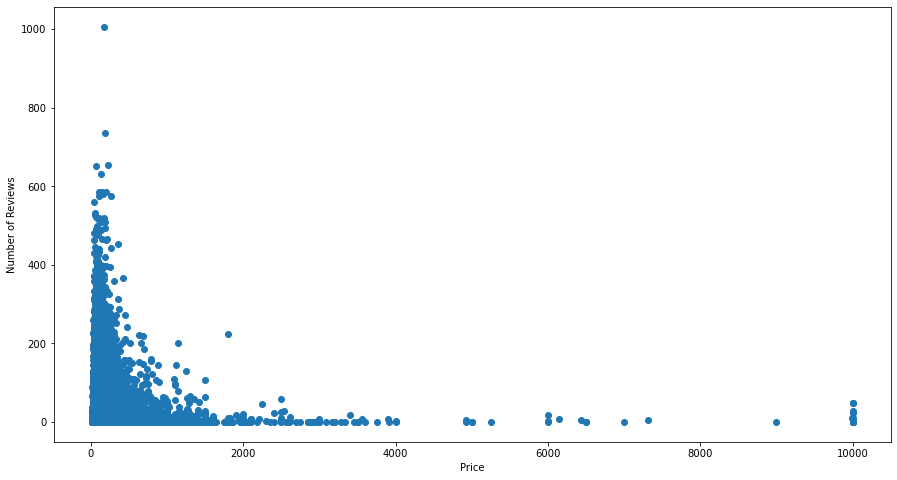

In [145]:
plt.figure(figsize=(15,8))
plt.scatter(y=no_of_reviews['number_of_reviews'], x=no_of_reviews['price'])
plt.ylabel('Number of Reviews')
plt.xlabel('Price')
plt.show()

Most of the listings with reviews are observed to be priced between \\$0 and \\$1000. As the price increases, the number of reviews decrease.
<br><br>
Let's try looking at the same graph but with the **log_price** column on the Y-Axis.

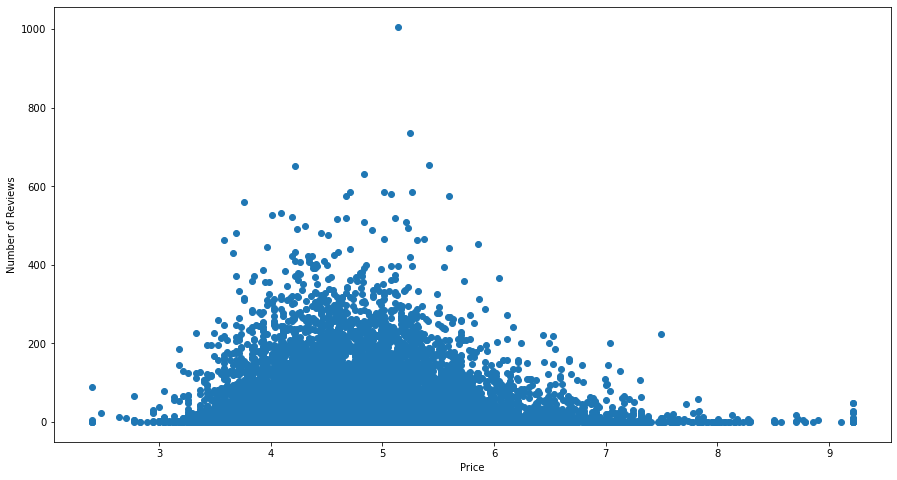

In [146]:
plt.figure(figsize=(15,8))
plt.scatter(y=no_of_reviews['number_of_reviews'], x=no_of_reviews['price_log'])
plt.ylabel('Number of Reviews')
plt.xlabel('Price')
plt.show()

We see in the above that the plot follows a normal distribution.

In [147]:
#listing with the most number of reviews
df.loc[df['number_of_reviews'].idxmax()]

id                                                                                       34071681
host_since                                                                             2019-04-25
host_response_time                                                                 within an hour
host_response_rate                                                                           83.0
host_acceptance_rate                                                                         95.0
host_is_superhost                                                                           False
host_listings_count                                                                           5.0
host_total_listings_count                                                                     5.0
host_verifications                                          ['email', 'phone', 'identity_manual']
host_has_profile_pic                                                                         True
host_identity_verifi

The listing with the most number of reviews has 1006 reviews and is priced at \\$169.0.

Text(0.5, 0, 'Number of Reviews (in the last 30 days)')

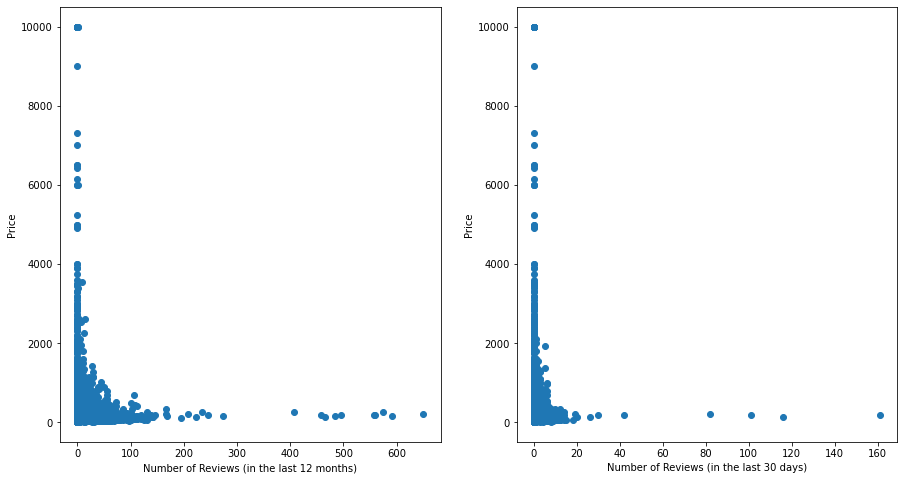

In [148]:
fig, ax = plt.subplots(figsize=(15,8))

ax1 = plt.subplot2grid((1, 2), (0, 0))
ax1.scatter(no_of_reviews['number_of_reviews_ltm'], no_of_reviews['price'])
ax1.set_ylabel('Price')
ax1.set_xlabel('Number of Reviews (in the last 12 months)')

ax2 = plt.subplot2grid((1, 2), (0, 1))
ax2.scatter(no_of_reviews['number_of_reviews_l30d'], no_of_reviews['price'])
ax2.set_ylabel('Price')
ax2.set_xlabel('Number of Reviews (in the last 30 days)')

With these columns as well, we see that  most of the listings with reviews are observed to be priced between \\$0 and \\$200. As the price increases, the number of reviews decrease. 

# Conclusion

We started the EDA portion of the project with a dataset that contained 31652 rows and 56 columns.
<br><br>
First, we decided that, because of the end goal of this project, Price is the dependent variable. <br>It displays a right-skewed distribution through the dataset.<br> However, using Log Transform showed us that the *log_price* column displays a bimodal distribution. 
<br><br>
The mean price for a unit in New York City is \\$169.78. <br>The median price is \\$113.0. <br>The maximum price is \\$10,000 and the minimum price is \\$10.
<br><br>
The borough a listing is located in does not seem to have an effect on the price of the listing. However, there are many outliers that might have had an effect on this conclusion and it is better to keep an eye out for this during the next stage of this project. The same can be applied to the particular neighborhoods a listing may be located in.
<br><br>
Following that, we found that the below parameters have an effect on price: <br>
• the allowance of long-term stays <br>
• the provision of a kitchen <br>
• the provision of hangers <br>
• the type of bathroom <br>
• the number of people a listing can accommodate<br>

While the following do not have an effect on price:<br>
• number of beds<br>
• number of bathrooms<br>
• the provision of hair dryer <br>
• the provision of wifi in the listing<br>
• the provision of a smoke alarm<br>
• the provision of air conditioning<br>
• the provision of a carbon monoxide alarm<br>
• the provision of "essentials"<br>
• the room type

Additional conclusions made were:<br>
• most of the reviews seem to lie between 4 and 5, particularly above 4.8<br>
• the price of a listing is affected by whether a listing has reviews or not<br>
• as the price increases, the number of reviews decrease <br>
• median price is higher for listings that are instantly bookable<br>
• median price is higher for listings that have availability

In [149]:
df.to_csv('C:\\Users\\cssv9\\Desktop\\SB DS\\df_eda.csv')